<a href="https://colab.research.google.com/github/ftriara/MBKM-Startup-Campus/blob/main/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library dan Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date

url = 'https://docs.google.com/spreadsheets/d/1dEcYWyw35Fa-0d9JPHl7Ugf5EMO8SwfqXfEjVK444WQ/export?format=csv'
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Information

In [ ]:
# melihat data-data pada setiap kolom
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# mengecek informasi dari dataset, terdapat jumlah nilai yang terisi dan tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dari informasi data di atas, terdapat sejumlah 81 kolom yang masing-masing kolom memiliki tipe data integer, float, maupun object. Selain itu, dari informasi di atas dapat diketahui bahwa beberapa kolom masih banyak mengandung nilai NaN.

In [ ]:
# melihat summary statistik dari masing-masing kolom untuk data numerik
pd.set_option('display.max_columns', None) # kode supaya ditampilkan seluruh kolom
df.iloc[:,1:].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# melihat summary statistik dari masing-masing kolom untuk data object
df.describe(include=object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# Data Preparation

## Missing Values

In [ ]:
# mencari missing values
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

### NaN menjadi NA

Mengubah kolom yang memang tidak memiliki atribut sesuai dengan kolom tersebut (tipe data object).

In [ ]:
none_col = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
            'Fence', 'MiscFeature']

for col in none_col:
  df[col].replace(np.nan, 'NA', inplace=True)

In [ ]:
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].head()

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NA,Gd,TA,No,GLQ,Unf,NA,Attchd,RFn,TA,TA,NA,NA,NA
1,NA,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NA,NA,NA
2,NA,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NA,NA,NA
3,NA,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NA,NA,NA
4,NA,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NA,NA,NA


### NaN menjadi 0

Mengubah kolom yang memang tidak memiliki atribut sesuai dengan kolom tersebut (tipe data numerik).

In [ ]:
zero_col = ['MasVnrArea', 'GarageYrBlt']

for col in zero_col:
  df[col].replace(np.nan, 0, inplace=True)

df['GarageYrBlt'] = df[['GarageYrBlt']].astype('int64') # mengubah tipe data kolom 'GarageYrBlt' menjadi integer

In [ ]:
df[['MasVnrArea', 'GarageYrBlt']].head()

,MasVnrArea,GarageYrBlt
0,196.0,2003
1,0.0,1976
2,162.0,2001
3,0.0,1998
4,350.0,2000


### Handling NaN dengan modus

Mengisi missing values pada kolom tersebut dengan menggunakan nilai modus karena kemungkinan kosong disebabkan human error.

In [ ]:
mode_col = ['MasVnrType', 'Electrical']

for col in mode_col:
  df[col].replace(np.nan, df[col].mode()[0], inplace=True)

In [ ]:
df[['MasVnrType', 'Electrical']].head()

,MasVnrType,Electrical
0,BrkFace,SBrkr
1,None,SBrkr
2,BrkFace,SBrkr
3,None,SBrkr
4,BrkFace,SBrkr


### NaN pada kolom LotFrontage

Mengisi missing values pada kolom LotFrontage dengan menggunakan nilai median dari data.

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## Duplicate Values

In [ ]:
# mengecek duplikasi data dalam dataset
df.duplicated().sum()

0

Dalam dataset tersebut tidak terdapat duplicate values.

## Outliers


Handling outlier pada kolom LotArea dan TotalBsmtSF:

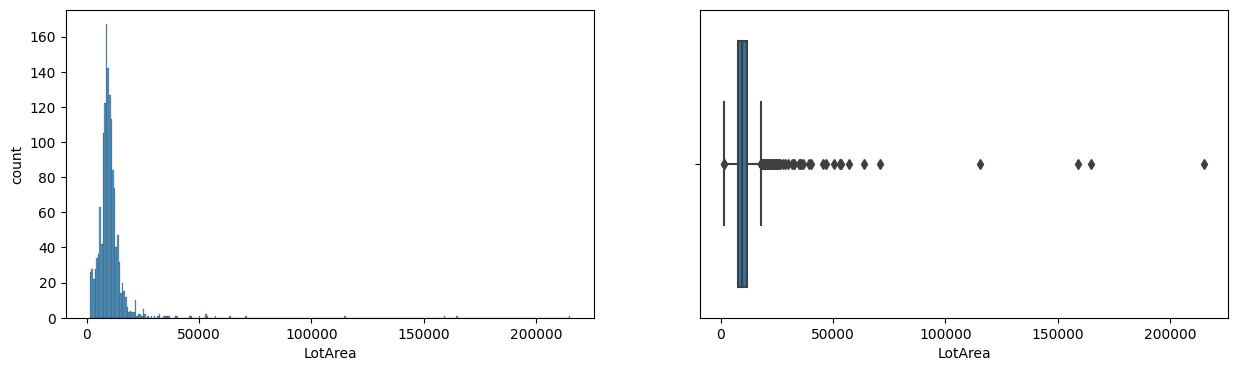

In [ ]:
# mengecek outlier pada kolom LotArea

plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.histplot(x = df['LotArea'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df['LotArea'])
plt.show()

In [ ]:
# handling outlier dengan metode IQR

df_LotArea = df[['LotArea']].copy()

#cari Q1, Q3, dan interquartile range
Q1 = df_LotArea.quantile(q=.25)
Q3 = df_LotArea.quantile(q=.75)
IQR = df_LotArea.apply(stats.iqr)

#ambil nilai antara 1.5*IQR dari Q1 dan Q3 aja
iqr_LotArea = df_LotArea[~((df_LotArea < (Q1-1.5*IQR)) | (df_LotArea > (Q3+1.5*IQR))).any(axis=1)]
df['LotArea'] = iqr_LotArea

<ipython-input-17-a10a106b5430>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


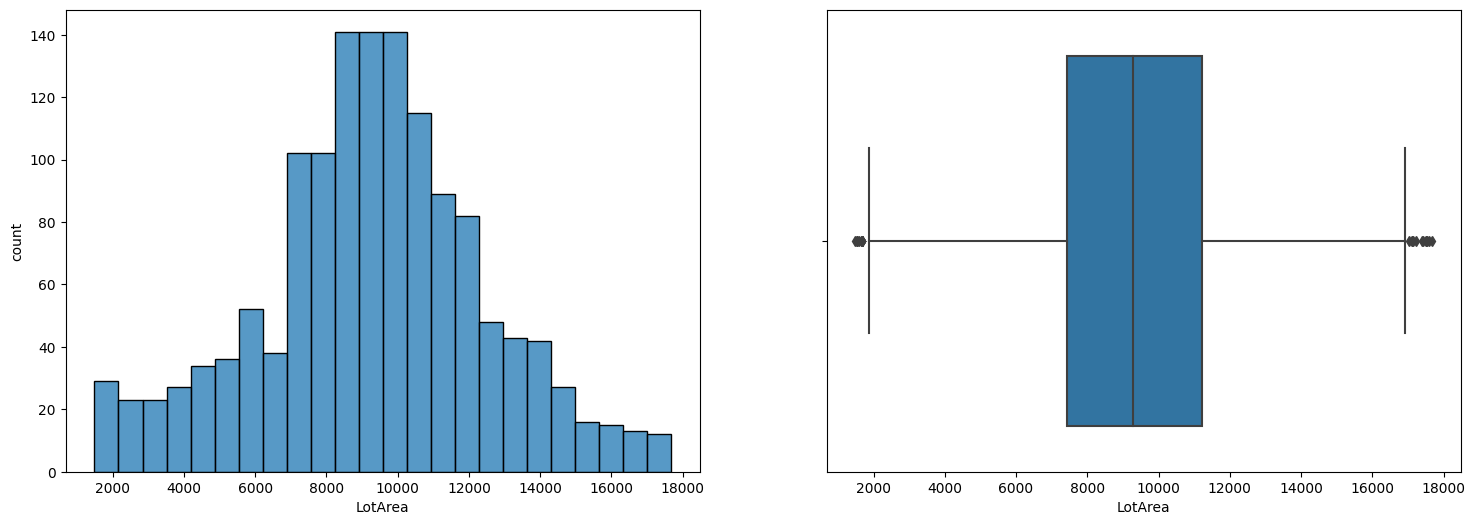

In [ ]:
fig, axe = plt.subplots(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['LotArea'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df['LotArea'])
plt.show()

Outlier pada kolom LotArea ditangani menggunakan metode IQR karena data pada kolom tersebut cenderung Positive Skew sehingga lebih sesuai apabila handling outlier dengan metode IQR.

<ipython-input-18-ea6bb3f13976>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


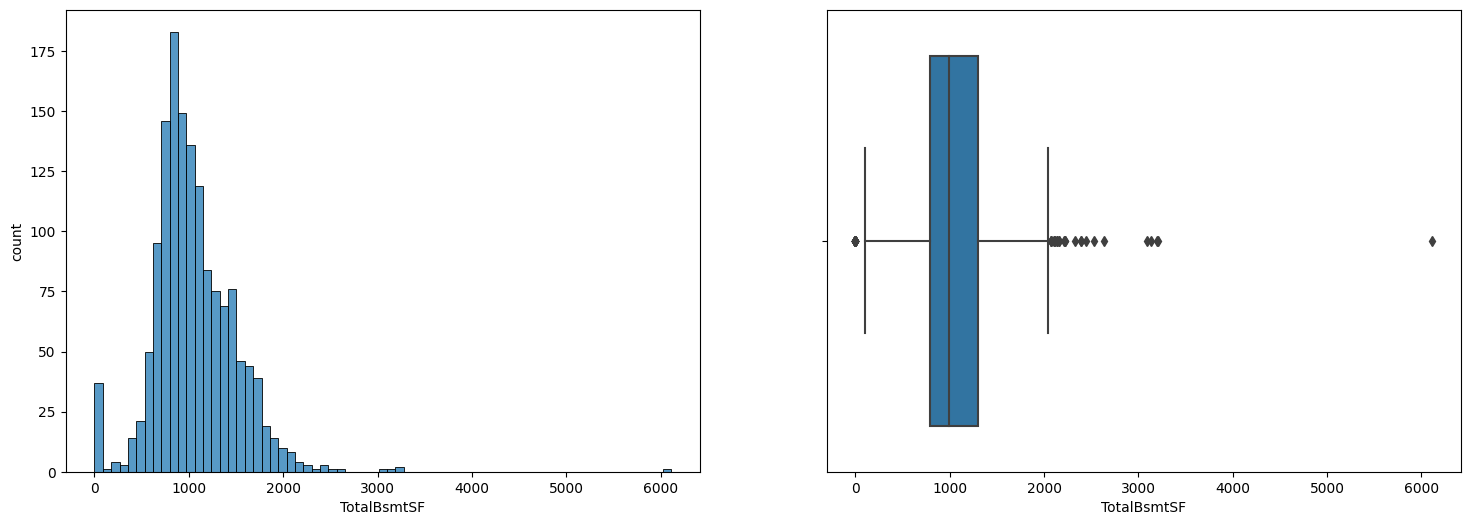

In [ ]:
# Mengecek outlier pada kolom TotalBsmtSF

fig, axes = plt.subplots(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['TotalBsmtSF'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df['TotalBsmtSF'])
plt.show()

In [ ]:
# handling outlier dengan metode z-score

df_TotalBsmtSF = df[['TotalBsmtSF']].copy()
zscore_TotalBsmtSF = df_TotalBsmtSF[(np.abs(stats.zscore(df_TotalBsmtSF)) < 3).all(axis=1)]
df['TotalBsmtSF'] = zscore_TotalBsmtSF

<ipython-input-20-697afd7c4e9d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


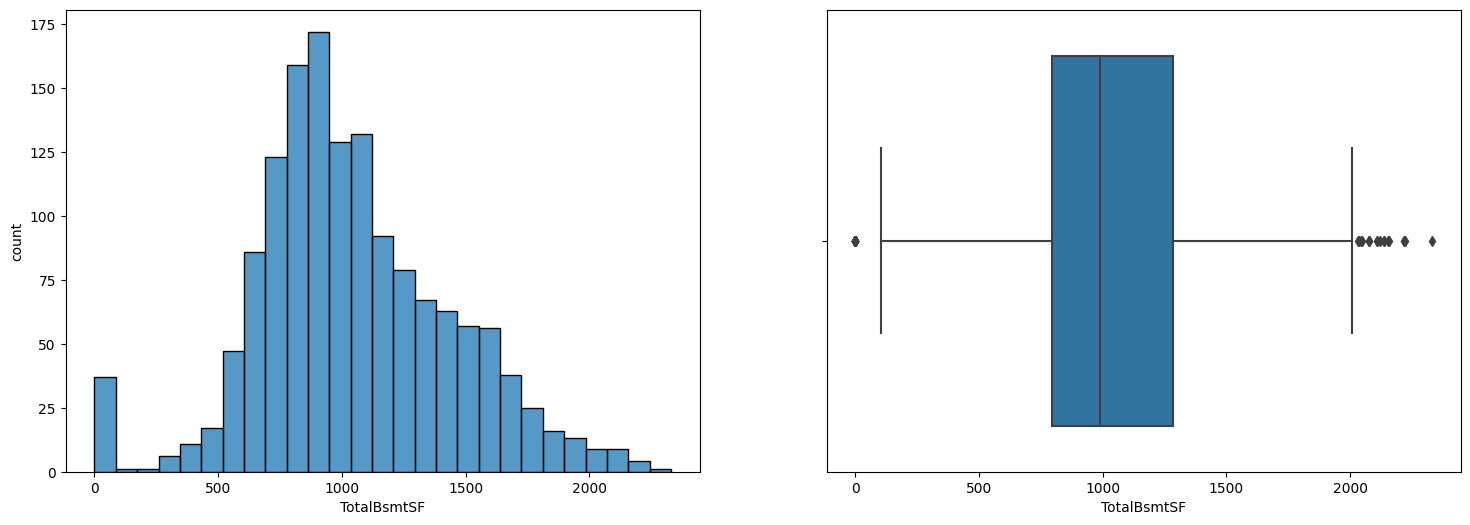

In [ ]:
fig, axess = plt.subplots(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['TotalBsmtSF'])
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x = df['TotalBsmtSF'])
plt.show()

Outlier pada kolom TotalBsmtSF ditangani menggunakan metode z-score dengan batas 3 untuk mempertahankan nilai minimum 0 pada kolom tersebut sehingga dapat terdeteksi rumah manakah yang tidak memiliki basement. Selain itu, metode z-score digunakan karena data pada kolom TotalBsmtSF hampir terdistribusi normal sehingga lebih sesuai menggunakan metode z-score.

## Imbalance Data

Pada dataset ini tidak perlu mencari imbalance data karena merupakan data regresi dan bukan data target.

## Feature Encoding

In [ ]:
# label encoding
col = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
for i in col:
  df[i].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0], inplace=True)

# label encoding pada kolom BsmtExposure
df['BsmtExposure'].replace(['Gd', 'Av', 'Mn', 'No', 'NA'], [4,3,2,1,0], inplace=True)

# label encoding pada kolom PoolQC
df['PoolQC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'NA'], [4,3,2,1,0], inplace=True)

# label encoding pada kolom CentralAir
df['CentralAir'].replace(['Y', 'N'], [1,0], inplace=True)

df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'PoolQC', 'CentralAir']].head(10)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtExposure,PoolQC,CentralAir
0,4,3,4,3,5,4,0,3,3,1,0,1
1,3,3,4,3,5,3,3,3,3,4,0,1
2,4,3,4,3,5,4,3,3,3,2,0,1
3,3,3,3,4,4,4,4,3,3,1,0,1
4,4,3,4,3,5,4,3,3,3,3,0,1
5,3,3,4,3,5,3,0,3,3,1,0,1
6,4,3,5,3,5,4,4,3,3,3,0,1
7,3,3,4,3,5,3,3,3,3,2,0,1
8,3,3,3,3,4,3,3,2,3,1,0,1
9,3,3,3,3,5,3,3,4,3,1,0,1


Gambar di atas merupakan hasil label encoding untuk kolom-kolom yang tertera. Label encoding digunakan untuk mengkonversi nilai-nilai kategorikal dalam kolom tersebut menjadi bentuk numerik.

# Feature Engineering

1. Fitur untuk mengetahui renovasi rumah

In [ ]:
# if else condition, angka 0 artinya tidak memiliki dan 1 artinya memiliki
df.loc[df['YearRemodAdd'] == df['YearBuilt'], 'IsRemodel'] = 0
df.loc[df['YearRemodAdd'] != df['YearBuilt'], 'IsRemodel'] = 1

col = df[['YearBuilt', 'YearRemodAdd', 'IsRemodel']].astype('int64') # kode untuk mengubah tipe data menjadi integer
df[['YearBuilt', 'YearRemodAdd', 'IsRemodel']] = col # re-assign value
df['IsRemodel'].value_counts()

0    764
1    696
Name: IsRemodel, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa terdapat sejumlah 696 rumah yang direnovasi dan 764 rumah yang merupakan bangunan asli tanpa remodel.

2. Fitur untuk mengetahui ada tidaknya lantai 2

In [ ]:
# if else condition, angka 0 artinya tidak memiliki dan 1 artinya memiliki
df['IsHas2ndFlr'] = df['2ndFlrSF'].apply(lambda x: 0 if x == 0 else 1)

df['IsHas2ndFlr'].value_counts()

0    829
1    631
Name: IsHas2ndFlr, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa terdapat sejumlah 631 rumah yang memiliki lantai 2 dan 829 rumah yang tidak memiliki lantai 2.

3. Fitur untuk mengetahui ada tidaknya akses gang ke rumah tersebut

In [ ]:
# if else condition, angka 0 artinya tidak memiliki dan 1 artinya memiliki
df['IsHasAlley'] = df['Alley'].apply(lambda x: 0 if x == 'NA' else 1)

df['IsHasAlley'].value_counts()

0    1369
1      91
Name: IsHasAlley, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa hanya 91 rumah yang memiliki akses gang untuk menuju rumah tersebut dan sisanya tidak.

4. Fitur untuk mengetahui ada tidaknya kolam renang pada rumah tersebut

In [ ]:
# if else condition, angka 0 artinya tidak memiliki dan 1 artinya memiliki
df.loc[(df['PoolArea'] == 0) & (df['PoolQC'] == 0), 'IsHasPool'] = 0
df.loc[(df['PoolArea'] > 0) & (df['PoolQC'] > 0), 'IsHasPool'] = 1

df['IsHasPool'] = df['IsHasPool'].astype('int64') # kode untuk mengubah tipe data menjadi integer

df['IsHasPool'].value_counts()

0    1453
1       7
Name: IsHasPool, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa hanya 7 rumah yang memiliki kolam renang dan sisanya tidak.

5. Fitur untuk mengetahui ada tidaknya garasi pada rumah tersebut

In [ ]:
# if else condition, angka 0 artinya tidak memiliki dan 1 artinya memiliki
df.loc[(df['GarageType'] == 'NA') & (df['GarageYrBlt'] == 0) & (df['GarageArea'] == 0), 'IsHasGarage'] = 0
df.loc[(df['GarageType'] != 'NA') & (df['GarageYrBlt'] > 0) & (df['GarageArea'] > 0), 'IsHasGarage'] = 1

df['IsHasGarage'] = df['IsHasGarage'].astype('int64') # kode untuk mengubah tipe data menjadi integer

df['IsHasGarage'].value_counts()

1    1379
0      81
Name: IsHasGarage, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa mayoritas rumah memiliki garasi yaitu sejumlah 1379 sedangkan sisanya tidak memiliki garasi.

6. Fitur untuk mengetahui kategori rumah yaitu luxurious (mewah), medium (menengah), dan simple (sederhana)

In [ ]:
# if else condition yang dikategorikan menjadi 3 yaitu Lux, Md, dan Sm
df.loc[(df['IsHasPool'] == 1) & (df['IsHas2ndFlr'] == 1) & (df['Fireplaces'] >= 1), 'HouseCategory'] = 'Lux'
df.loc[(df['IsHasPool'] == 0) & (df['IsHas2ndFlr'] == 0) & (df['Fireplaces'] == 0), 'HouseCategory'] = 'Sm'
df.loc[(df['IsHasPool'] == 1) & (df['IsHas2ndFlr'] == 1) & (df['Fireplaces'] == 0), 'HouseCategory'] = 'Md'
df.loc[(df['IsHasPool'] == 0) & (df['IsHas2ndFlr'] == 0) & (df['Fireplaces'] >= 1), 'HouseCategory'] = 'Md'
df.loc[(((df['IsHasPool'] == 1) & (df['IsHas2ndFlr'] == 0)) | ((df['IsHasPool'] == 0) & (df['IsHas2ndFlr'] == 1))) & (df['Fireplaces'] >= 0), 'HouseCategory'] = 'Md'

df['HouseCategory'].value_counts()

# df.drop(['HouseCategory'], axis=1)

Md     1015
Sm      440
Lux       5
Name: HouseCategory, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui klasifikasi rumah yang dijual yaitu hanya terdapat 5 rumah yang masuk kategori mewah, 1015 rumah dengan kategori menengah, dan 440 rumah dengan kategori sederhana.

7. Fitur untuk mengetahui jumlah keseluruhan kamar mandi dalam rumah tersebut

In [ ]:
# mencari total kamar mandi dalam rumah tersebut
df['TotalBathrooms'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
df['TotalBathrooms'].describe()

count    1460.000000
mean        2.430822
std         0.922647
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: TotalBathrooms, dtype: float64

Berdasarkan fitur tersebut, dapat diketahui bahwa rumah dapat memiliki 1 hingga 6 kamar mandi di rumahnya. Apabila dilakukan rata-rata, maka tiap rumah memiliki 2 hingga 3 kamar mandi di rumahnya termasuk kamar mandi yang berada di basement.

8. Fitur untuk mengetahui apakah basement terkena cahaya matahari atau tidak

In [ ]:
# if else condition yang dikategorikan menjadi 3 yaitu NA, N, dan Y
df.loc[df['BsmtExposure'] == 0, 'IsBsmtExposure'] = 'NA'
df.loc[df['BsmtExposure'] == 1, 'IsBsmtExposure'] = 'N'
df.loc[df['BsmtExposure'] > 1, 'IsBsmtExposure'] = 'Y'

df['IsBsmtExposure'].value_counts()

N     953
Y     469
NA     38
Name: IsBsmtExposure, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa terdapat 953 rumah yang basementnya tidak dapat dimasuki cahaya matahari dan 469 rumah yang basementnya mendapat cahaya matahari, sedangkan sisanya merupakan rumah yang tidak memiliki basement.

9. Fitur untuk mengetahui akses jalan ke rumah tersebut dalam kategori good (baik), medium (menengah), atau poor (buruk)

In [ ]:
# if else condition yang dikategorikan menjadi 3 yaitu Gd, Md, dan Pr
df.loc[(df['Alley'] == 'NA') & ((df['PavedDrive'] == 'Y') | (df['PavedDrive'] == 'P')), 'RoadAccess'] = 'Gd'
df.loc[((df['Alley'] == 'Pave') | (df['Alley'] == 'Grvl')) & ((df['PavedDrive'] == 'Y') | (df['PavedDrive'] == 'P')), 'RoadAccess'] = 'Md'
df.loc[((df['Alley'] == 'Pave') | (df['Alley'] == 'Grvl') | (df['Alley'] == 'NA')) & (df['PavedDrive'] == 'N'), 'RoadAccess'] = 'Pr'

df['RoadAccess'].value_counts()

Gd    1301
Pr      90
Md      69
Name: RoadAccess, dtype: int64

Berdasarkan fitur tersebut, dapat diketahui bahwa mayoritas rumah memiliki akses jalan yang baik sejumlah 1301, akses jalan berkategori menengah sejumlah 69, dan akses jalan buruk sejumlah 90.


10. Fitur untuk mengetahui usia rumah

In [ ]:
# mencari umur dari masing-masing rumah tersebut
df['HouseAge'] = date.today().year - df['YearBuilt']
df['HouseAge'].describe()

count    1460.000000
mean       51.732192
std        30.202904
min        13.000000
25%        23.000000
50%        50.000000
75%        69.000000
max       151.000000
Name: HouseAge, dtype: float64

Berdasarkan fitur tersebut, dapat diketahui bahwa rata-rata rumah yang dijual memiliki umur 52 tahun dimana rumah yang paling tua berumur 151 tahun.

# Exploratory Data Analysis (EDA)

1. Elaborate features and its statistical data type (nominal, ordinal, numerical)

Dalam pengelompokan data, terdapat 3 jenis yaitu nominal, ordinal dan numerical. Untuk data nominal, perlu mengubah tipe data kolom menjadi object. Sedangkan, untuk data ordinal perlu untuk mengubah tipe data kolom menjadi category.

In [ ]:
# memisahkan kolom dengan tipe data numerik dan kategorik
num_to_nom = ['MSSubClass', 'CentralAir', 'IsRemodel', 'IsHas2ndFlr', 'IsHasAlley', 'IsHasPool', 'IsHasGarage']
for ntn in num_to_nom:
  df[ntn] = df[ntn].astype('object') # mengubah tipe data kolom dari numerik menjadi object

num_to_or = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'PoolQC', 'OverallQual', 'OverallCond', 'HouseCategory', 'RoadAccess']
for nto in num_to_or:
  df[nto] = df[nto].astype('category') # mengubah tipe data kolom menjadi kategorik

nom_col = df.select_dtypes(include = 'object').columns.tolist()
or_col = df.select_dtypes(include = 'category').columns.tolist()
num_col = df.select_dtypes(include = np.number).columns.tolist()

print("Nominal variable   : ", nom_col)
print("Ordinal variable   : ", or_col)
print("Numerical variable : ", num_col)

Nominal variable   :  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'IsRemodel', 'IsHas2ndFlr', 'IsHasAlley', 'IsHasPool', 'IsHasGarage', 'IsBsmtExposure']
Ordinal variable   :  ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'HouseCategory', 'RoadAccess']
Numerical variable :  ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Bsmt

In [ ]:
print("Nominal variable")
df[nom_col].head()

Nominal variable


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,IsRemodel,IsHas2ndFlr,IsHasAlley,IsHasPool,IsHasGarage,IsBsmtExposure
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,1,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,0,1,0,0,1,N
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,ALQ,Unf,GasA,1,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,0,0,0,0,1,Y
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,1,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,1,1,0,0,1,Y
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,ALQ,Unf,GasA,1,SBrkr,Typ,Detchd,Unf,Y,NA,NA,WD,Abnorml,1,1,0,0,1,N
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GLQ,Unf,GasA,1,SBrkr,Typ,Attchd,RFn,Y,NA,NA,WD,Normal,0,1,0,0,1,Y


In [ ]:
print("Ordinal variable")
df[or_col].head()

Ordinal variable


,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,HouseCategory,RoadAccess
0,7,5,4,3,4,3,1,5,4,0,3,3,0,Md,Gd
1,6,8,3,3,4,3,4,5,3,3,3,3,0,Md,Gd
2,7,5,4,3,4,3,2,5,4,3,3,3,0,Md,Gd
3,7,5,3,3,3,4,1,4,4,4,3,3,0,Md,Gd
4,8,5,4,3,4,3,3,5,4,3,3,3,0,Md,Gd


In [ ]:
print("Numerical variable")
df[num_col].head()

Numerical variable


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBathrooms,HouseAge
0,1,65.0,8450.0,2003,2003,196.0,706,0,150,856.0,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,4,20
1,2,80.0,9600.0,1976,1976,0.0,978,0,284,1262.0,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,3,47
2,3,68.0,11250.0,2001,2002,162.0,486,0,434,920.0,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,4,22
3,4,60.0,9550.0,1915,1970,0.0,216,0,540,756.0,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000,2,108
4,5,84.0,14260.0,2000,2000,350.0,655,0,490,1145.0,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000,4,23


2. Explain the situation and the difference to use mean, median and modus

a. Mean digunakan pada data yang bersifat numerik. Mean dapat digunakan untuk handling missing values ketika data pada kolom tersebut terdistribusi normal. Sebagai contoh dalam menangani missing values pada kolom LotArea.

Skew : -0.07


<Axes: xlabel='LotArea', ylabel='Count'>

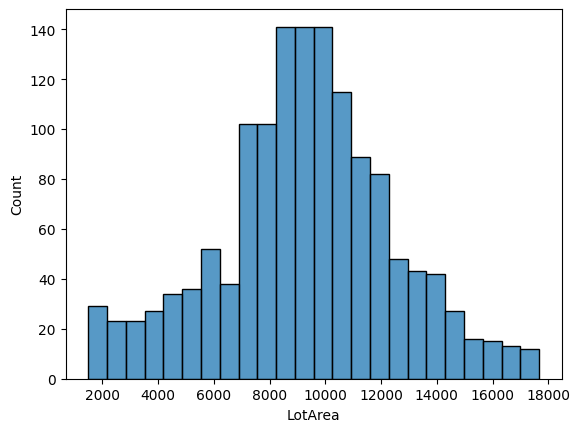

In [ ]:
print('Skew :', round(df['LotArea'].skew(), 2))
sns.histplot(x = df['LotArea'])

<Axes: xlabel='LotArea', ylabel='Count'>

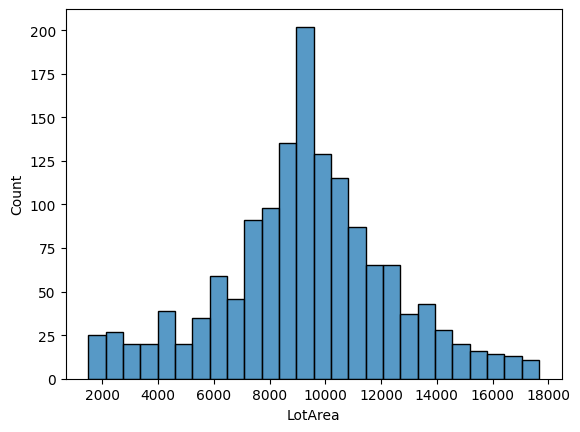

In [ ]:
df['LotArea'] = df['LotArea'].fillna(df['LotArea'].mean())
sns.histplot(x = df['LotArea'])

b. Median digunakan pada data yang bersifat numerik. Median dapat digunakan untuk handling missing values ketika data pada kolom tersebut cenderung positive skew atau negative skew. Sebagai contoh, dalam menangani missing values pada kolom TotalBsmtSF.

Skew : 0.18


<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

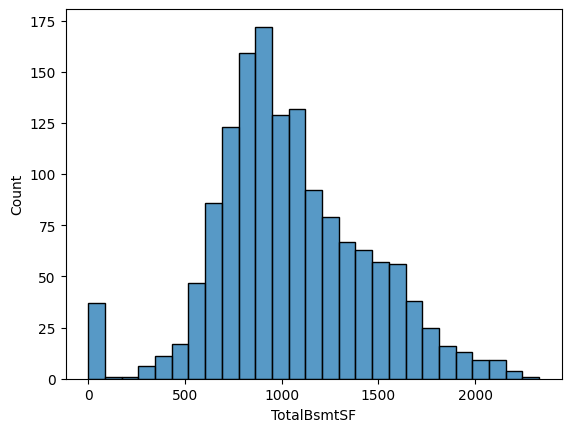

In [ ]:
print('Skew :', round(df['TotalBsmtSF'].skew(), 2))
sns.histplot(x = df['TotalBsmtSF'])

<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

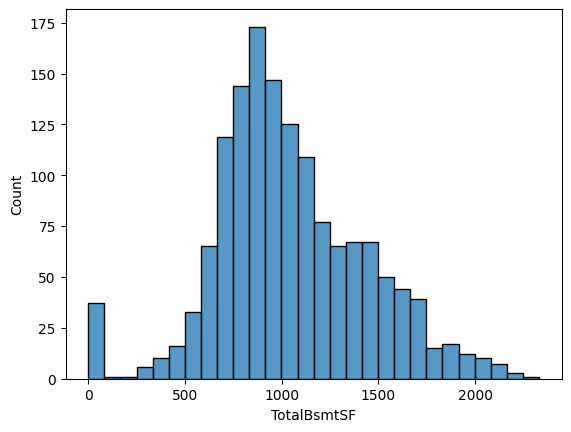

In [ ]:
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median())
sns.histplot(x = df['TotalBsmtSF'])

c. Modus digunakan pada data yang bersifat ordinal. Modus dapat digunakan untuk handling missing values pada data ordinal yang memiliki rentang. Selain itu, modus dapat digunakan untuk mengetahui kategori dengan nilai terbanyak dari suatu kolom. Sebagai contoh, dalam mencari kategori dengan nilai terbanyak pada kolom MSZoning.

In [ ]:
mode_MSZoning = df['MSZoning'].mode()
print(mode_MSZoning)

0    RL
Name: MSZoning, dtype: object


3. Explain statistical five summaries (describe)

In [ ]:
# mengecek summary statistic
df.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBathrooms,HouseAge
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,9272.537024,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1042.883562,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,2.430822,51.732192
std,421.610009,22.027677,3120.225914,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,394.616476,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,0.922647,30.202904
min,1.000000,21.000000,1491.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,1.000000,13.000000
25%,365.750000,60.000000,7560.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2.000000,23.000000
50%,730.500000,69.000000,9272.537024,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,990.000000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,2.000000,50.000000
75%,1095.250000,79.000000,11107.250000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1278.750000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3.000000,69.000000
max,1460.000000,313.000000,17671.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,2330.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,6.000000,151.000000


In [ ]:
# mengecek summary statistic untuk kolom yang memiliki tipe data object
df.describe(include='object')

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,IsRemodel,IsHas2ndFlr,IsHasAlley,IsHasPool,IsHasGarage,IsBsmtExposure
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,6,7,7,6,2,5,7,7,4,3,5,5,9,6,2,2,2,2,2,3
top,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,Unf,Unf,GasA,1,SBrkr,Typ,Attchd,Unf,Y,NA,NA,WD,Normal,0,0,0,0,1,N
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,647,430,1256,1428,1365,1335,1360,870,605,1340,1179,1406,1267,1198,764,829,1369,1453,1379,953


Data di atas menunjukkan summary statistic dari setiap kolom baik kolom yang bersifat numerik maupun kategorik. Pada kolom yang bersifat numerik dapat diketahui jumlah data, mean, median, standar deviasi, nilai minimum dan maksimum, quantile 25, serta quantile 75. Sedangkan, untuk data yang bersifat kategorik dapat diketahui jumlah data, jumlah nilai yang unik, modus, dan frekuensinya. Misalnya pada kolom SalePrice, rata-rata harga rumah adalah 180,921 dengan harga paling minimum adalah 34,900 dan maksimumnya 755,000.

4. Describe distribution

LotFrontage
Skew : 2.41


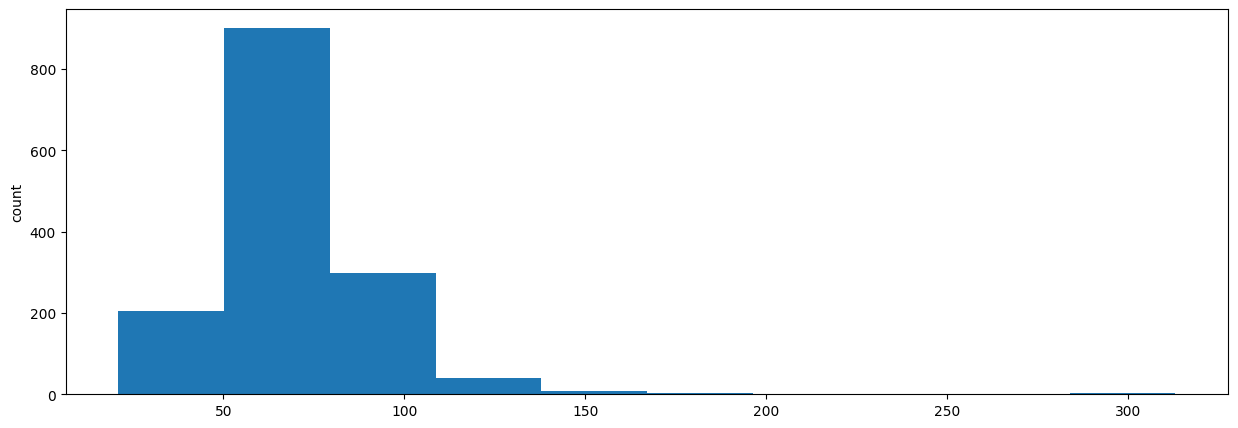

LotArea
Skew : -0.08


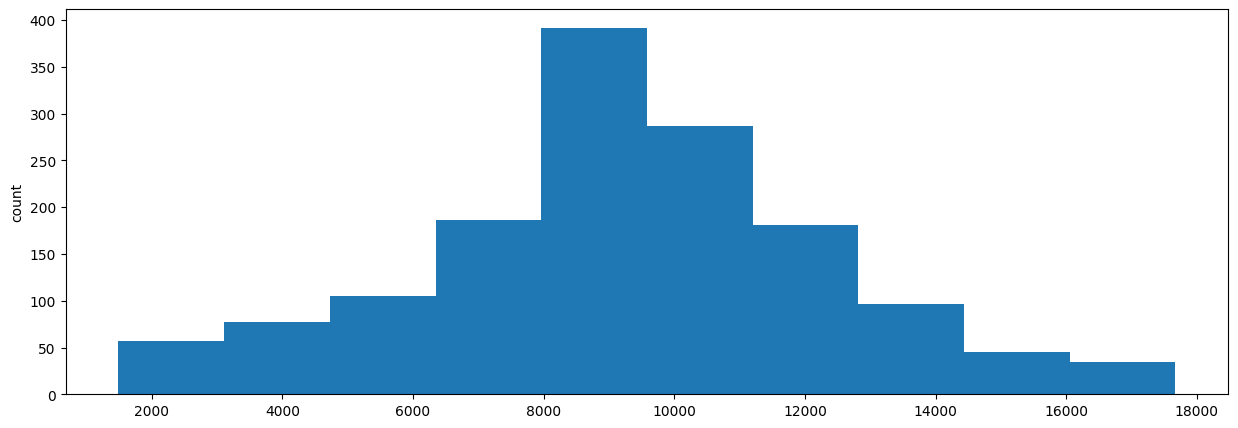

MasVnrArea
Skew : 2.68


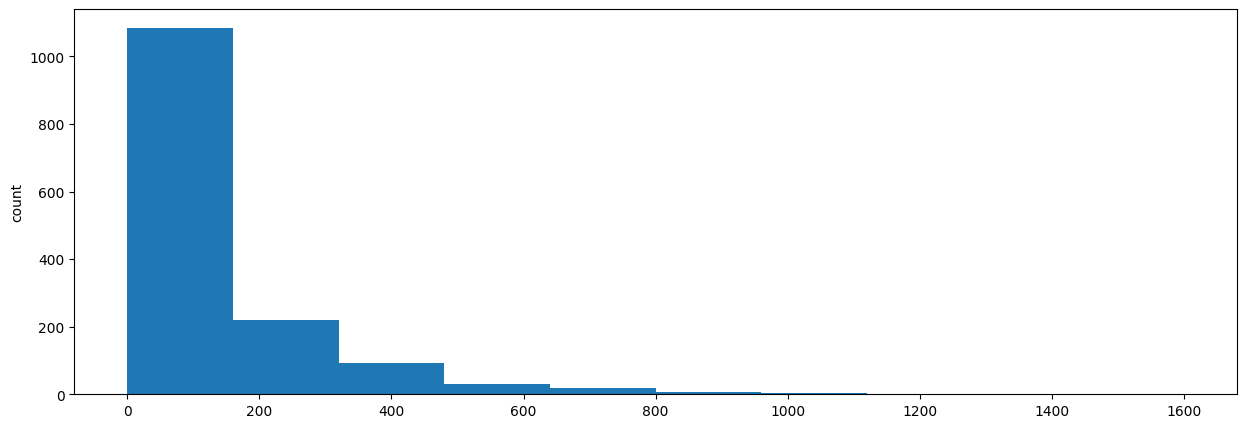

BsmtFinSF1
Skew : 1.69


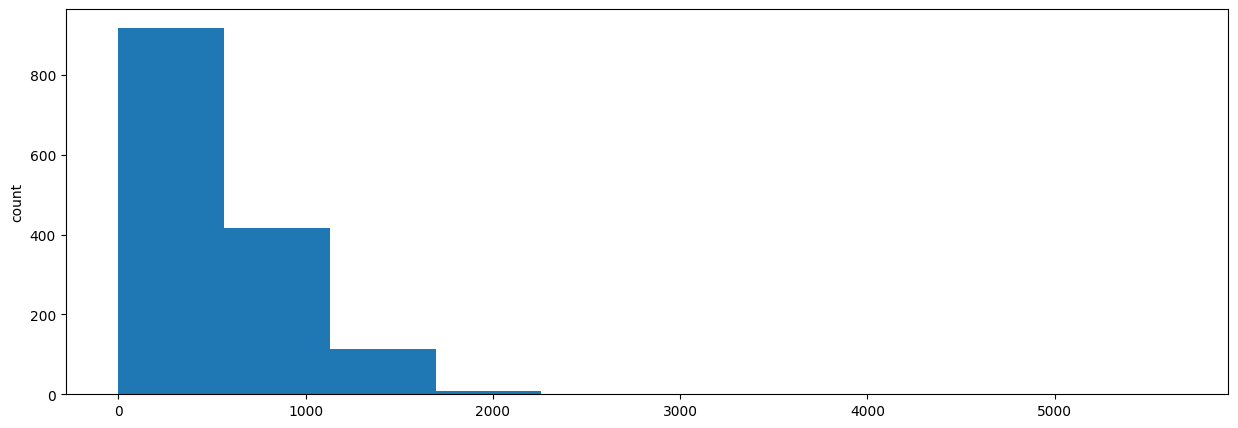

BsmtFinSF2
Skew : 4.26


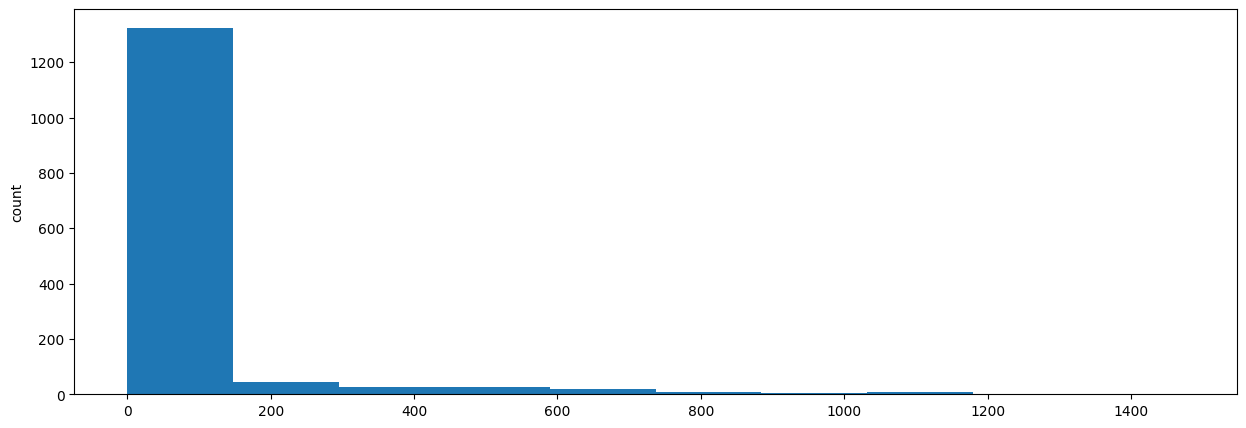

BsmtUnfSF
Skew : 0.92


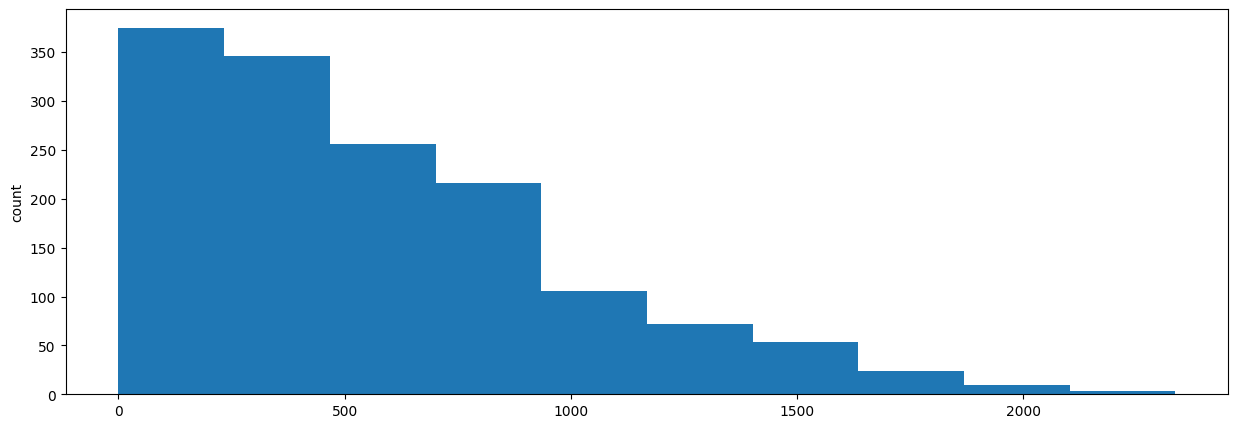

TotalBsmtSF
Skew : 0.19


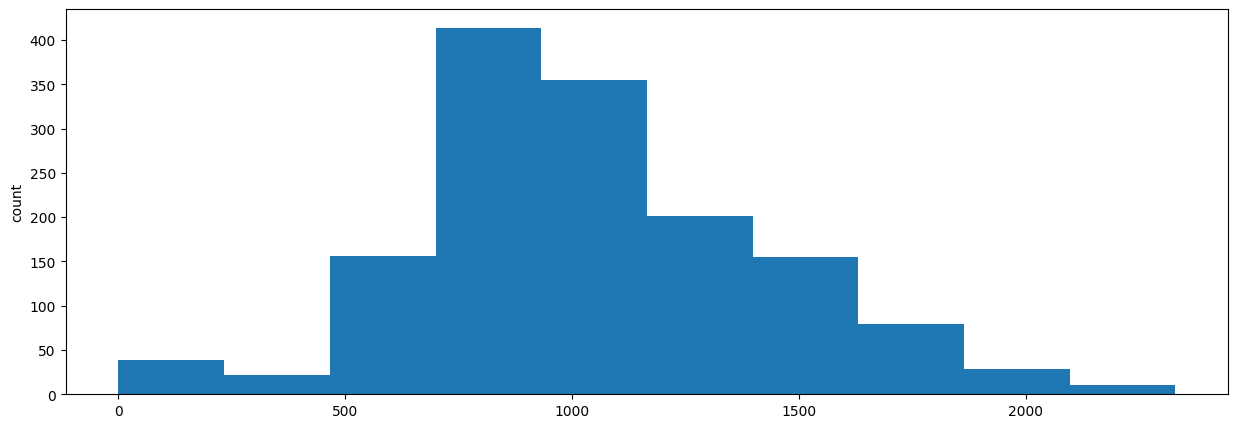

1stFlrSF
Skew : 1.38


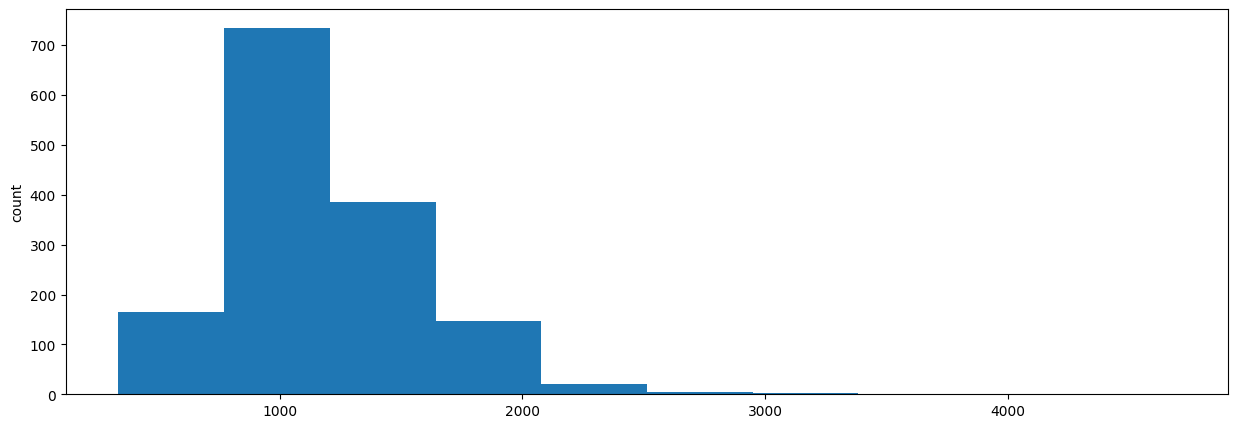

2ndFlrSF
Skew : 0.81


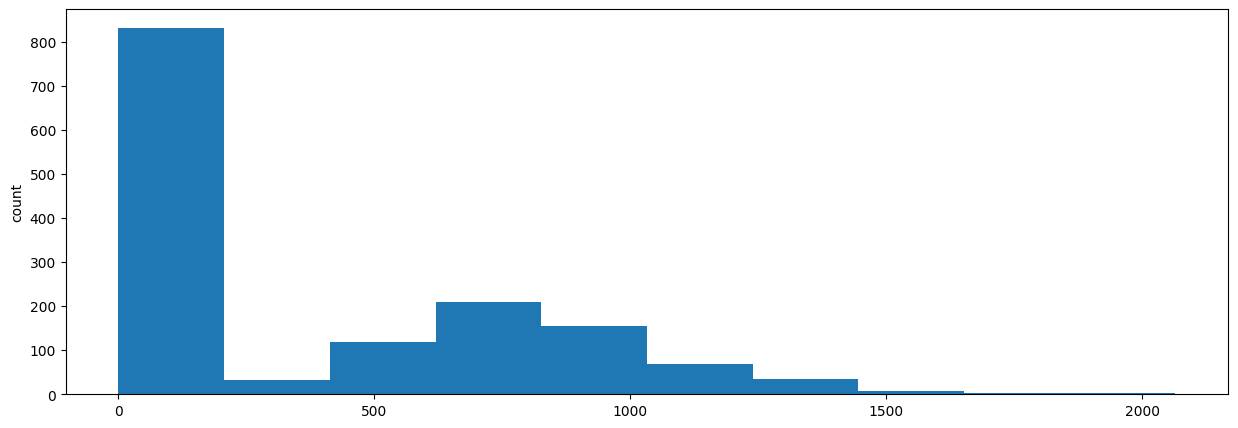

LowQualFinSF
Skew : 9.01


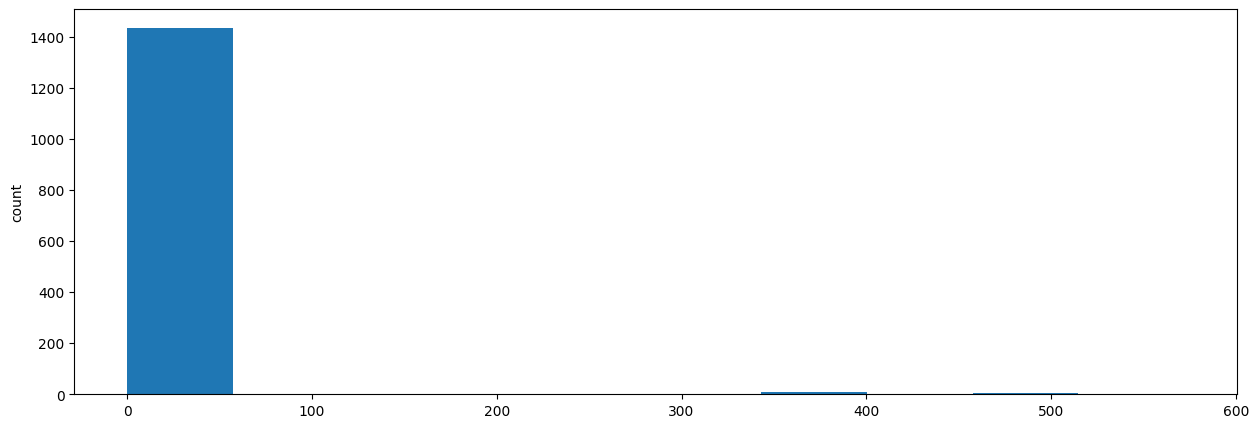

GrLivArea
Skew : 1.37


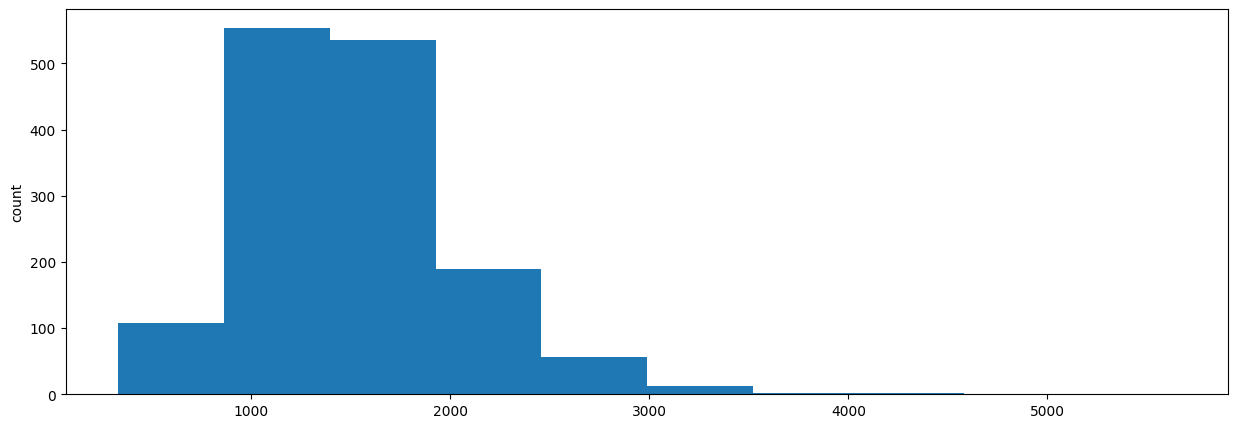

BsmtFullBath
Skew : 0.6


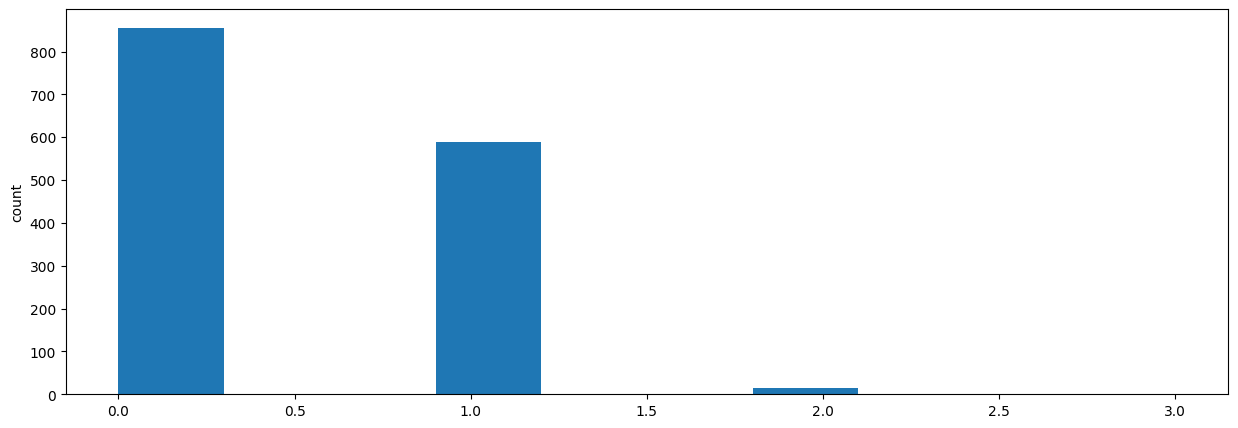

BsmtHalfBath
Skew : 4.1


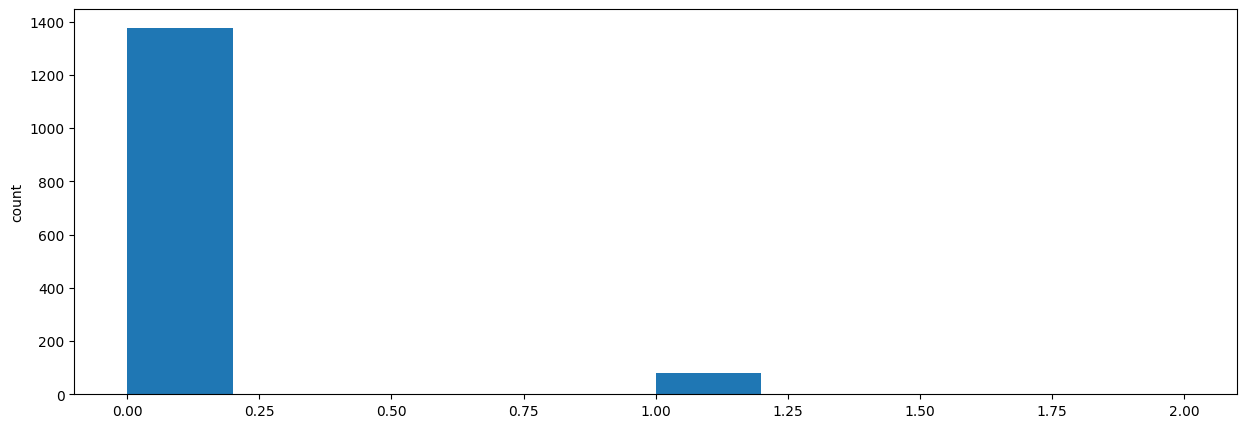

FullBath
Skew : 0.04


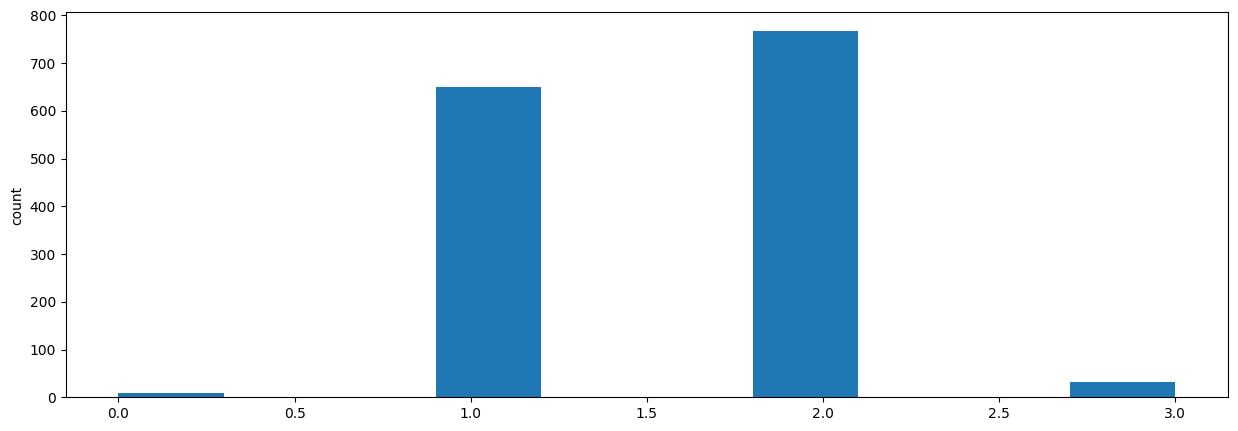

HalfBath
Skew : 0.68


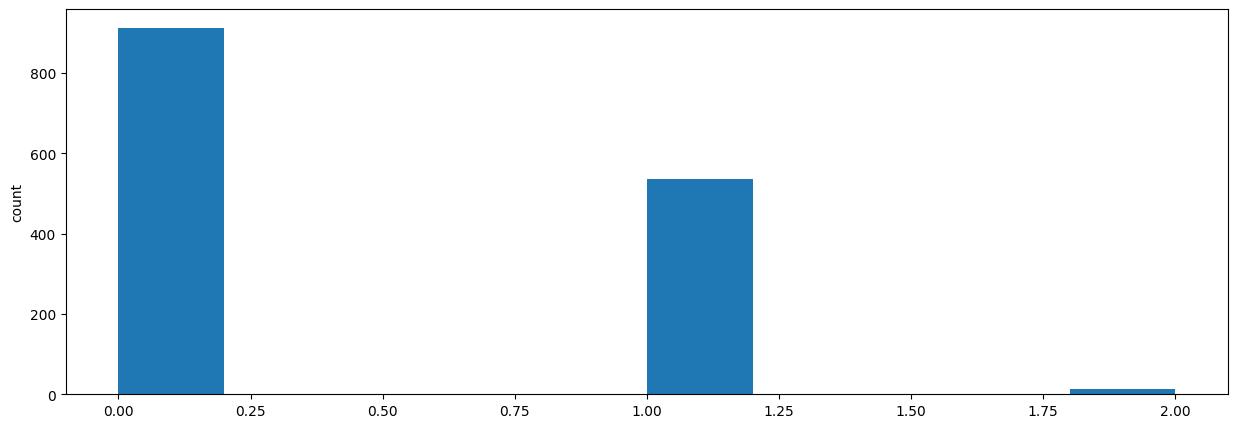

BedroomAbvGr
Skew : 0.21


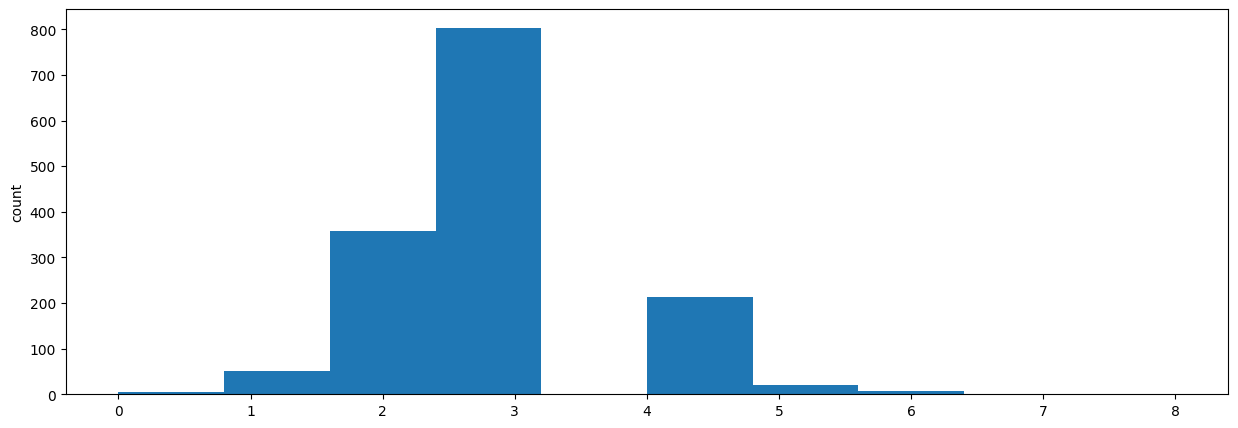

KitchenAbvGr
Skew : 4.49


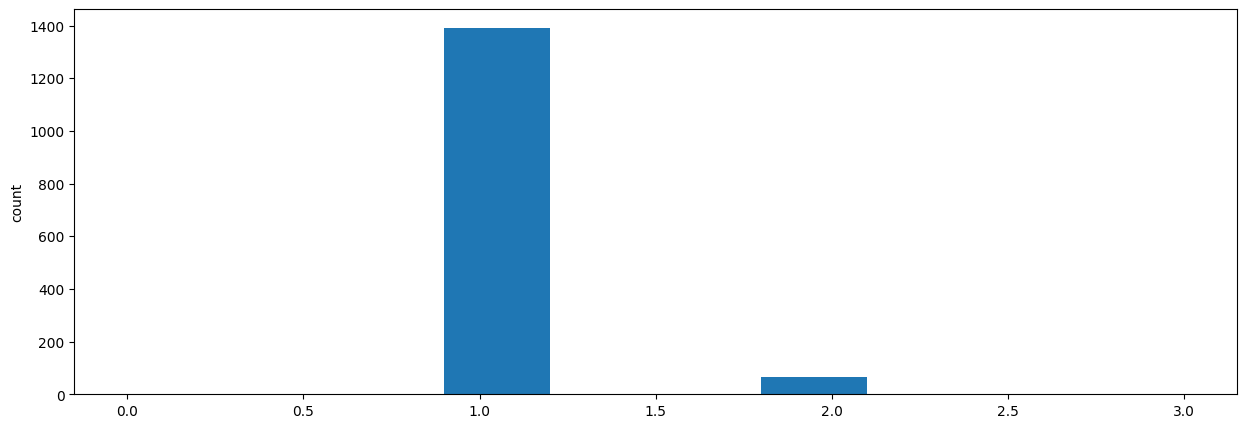

TotRmsAbvGrd
Skew : 0.68


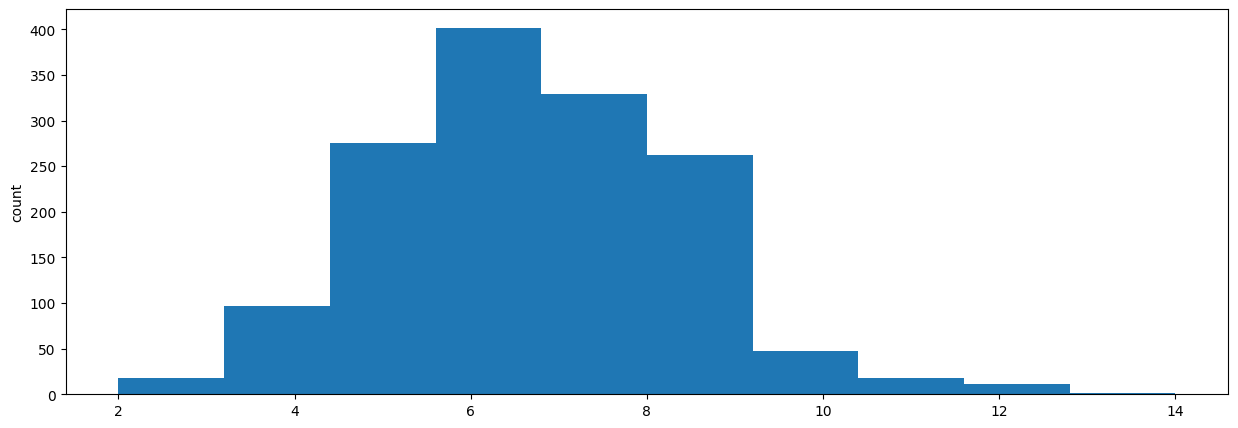

Fireplaces
Skew : 0.65


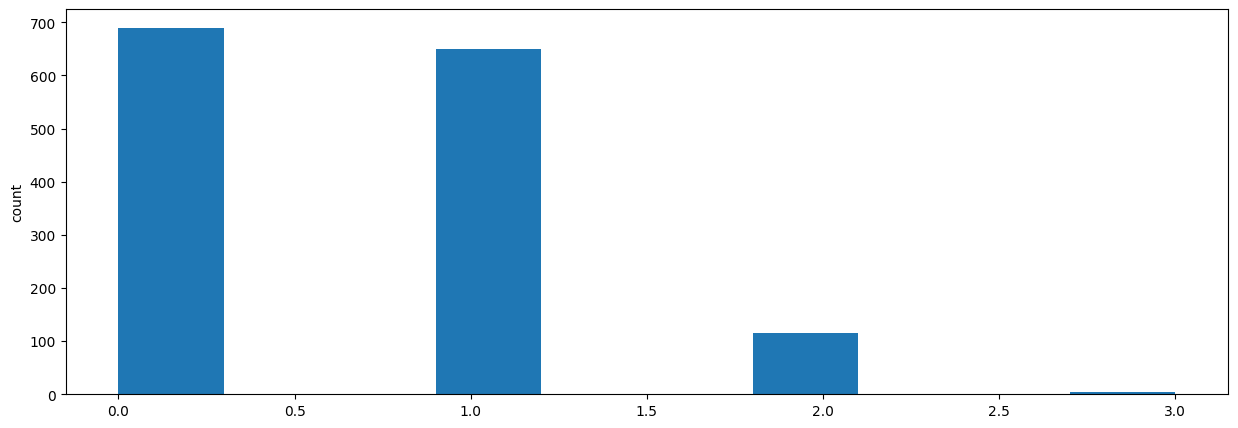

GarageCars
Skew : -0.34


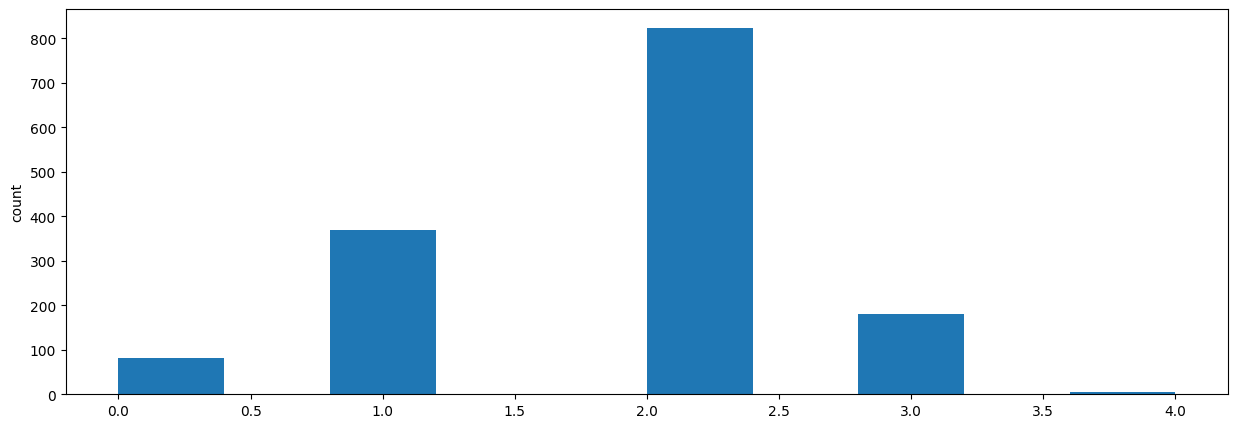

GarageArea
Skew : 0.18


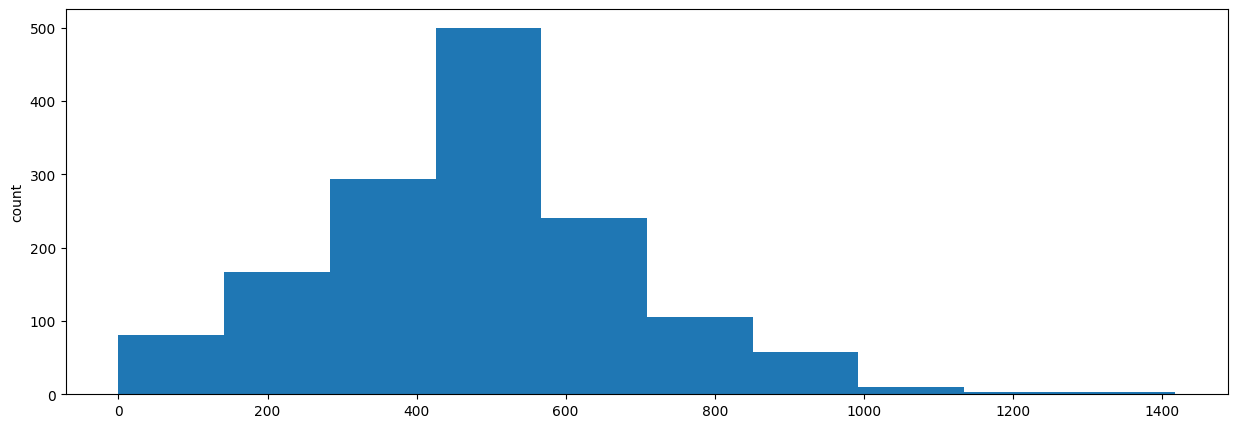

WoodDeckSF
Skew : 1.54


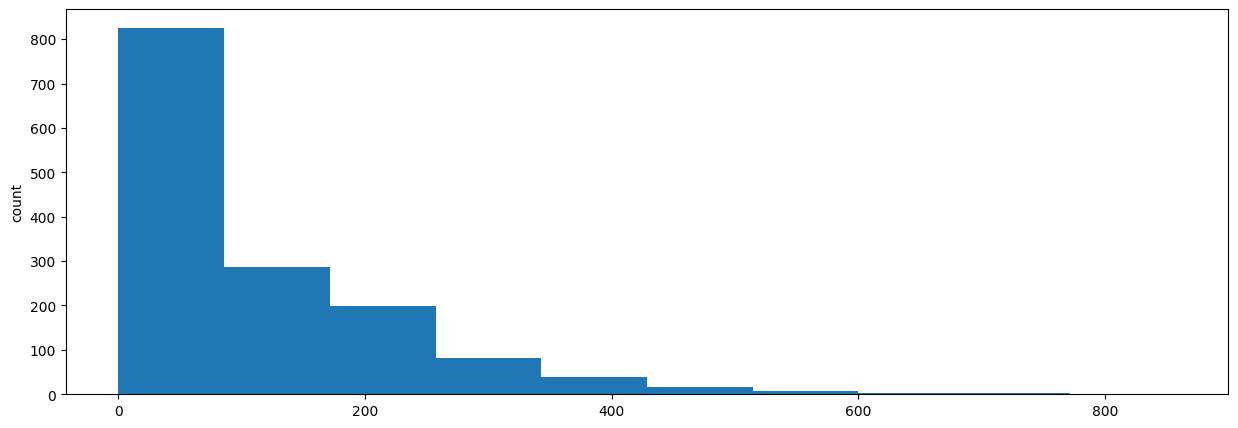

OpenPorchSF
Skew : 2.36


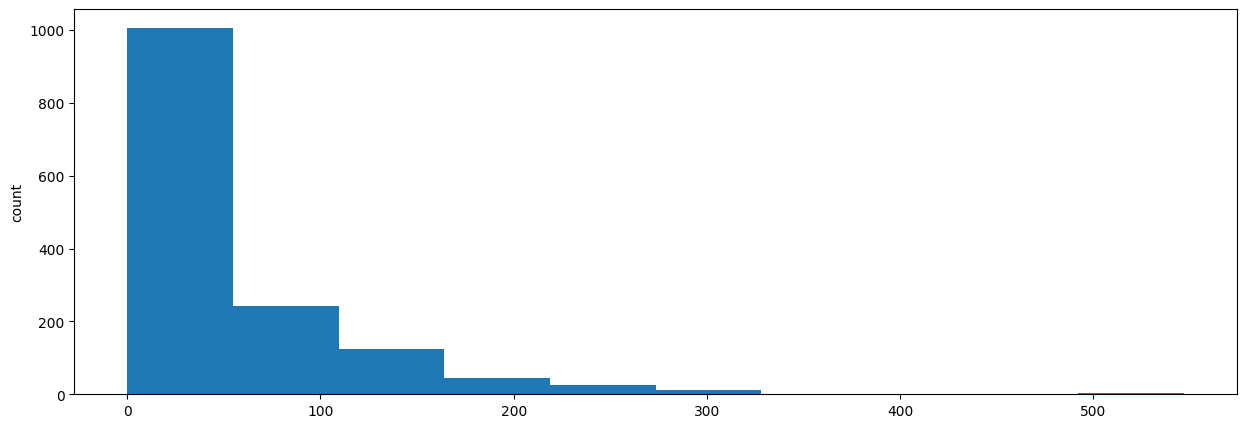

EnclosedPorch
Skew : 3.09


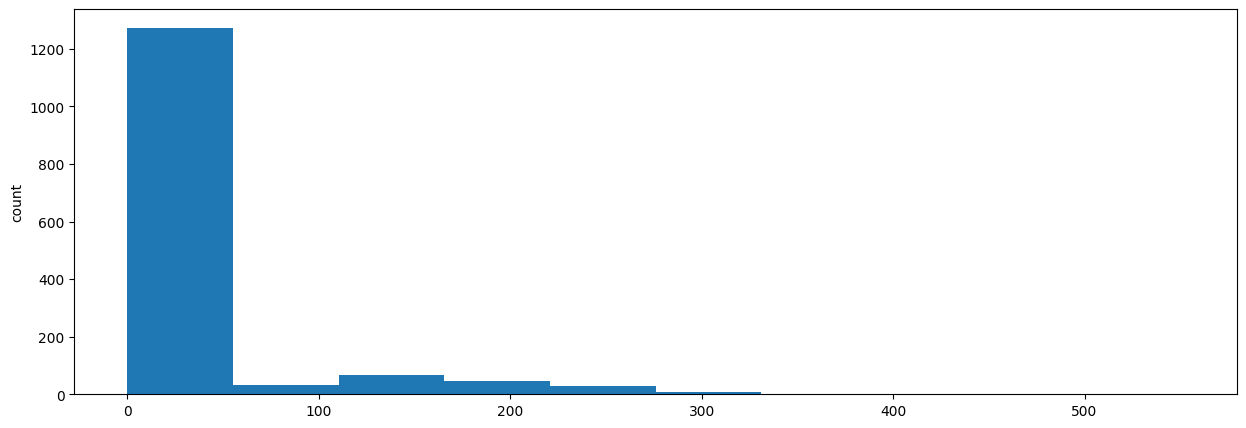

3SsnPorch
Skew : 10.3


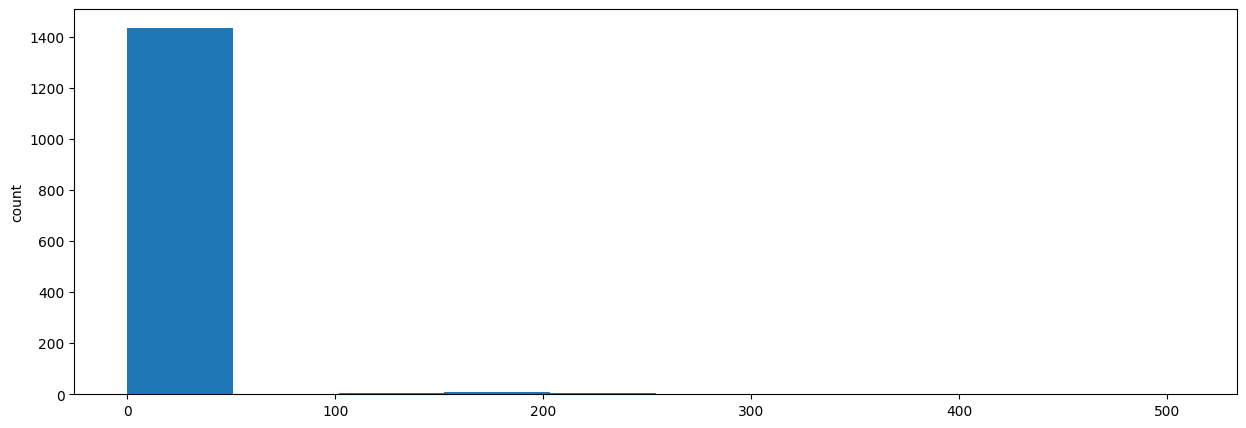

ScreenPorch
Skew : 4.12


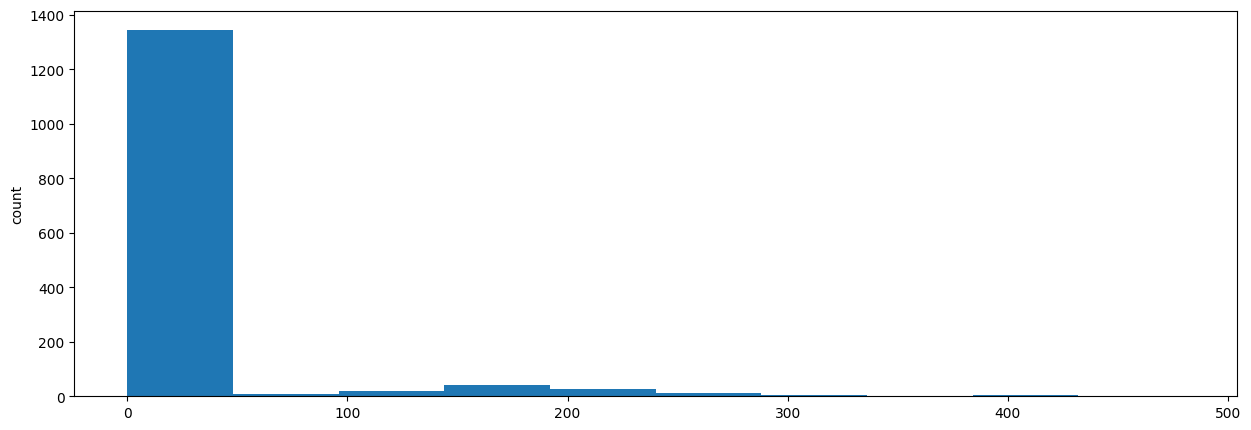

PoolArea
Skew : 14.83


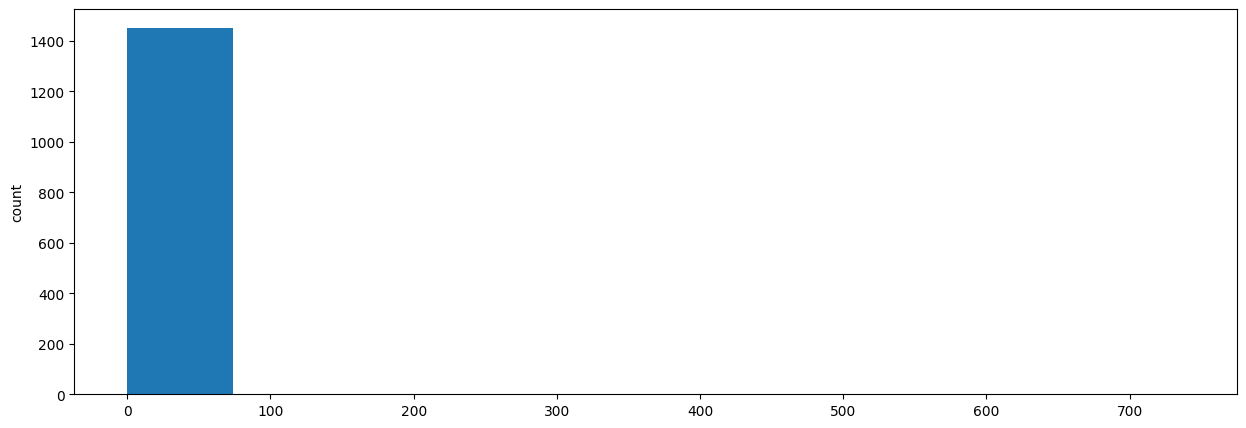

MiscVal
Skew : 24.48


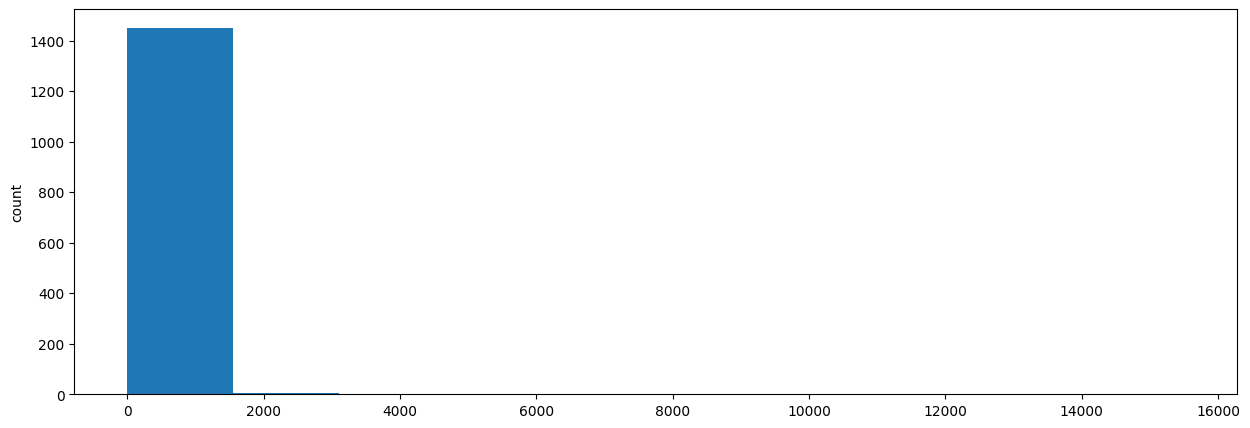

SalePrice
Skew : 1.88


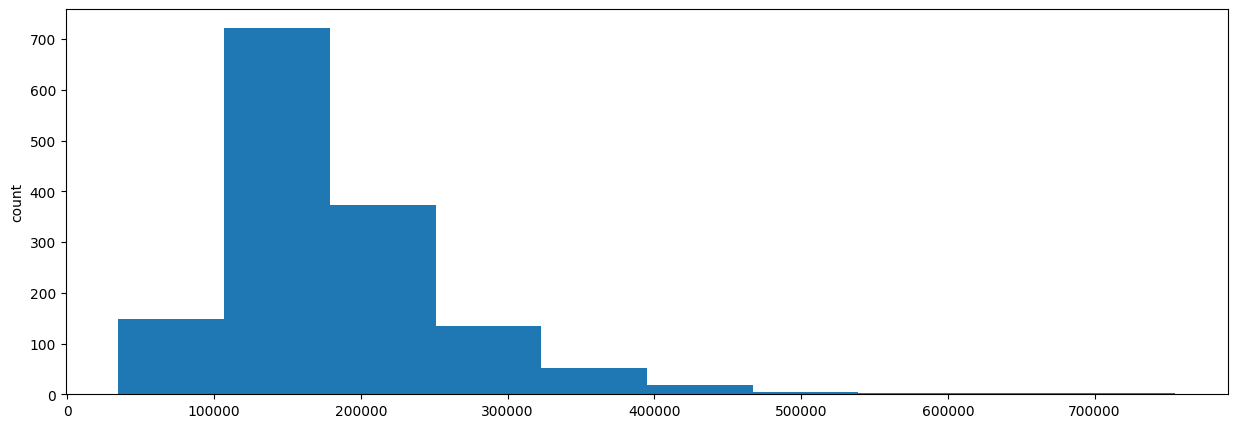

TotalBathrooms
Skew : 0.27


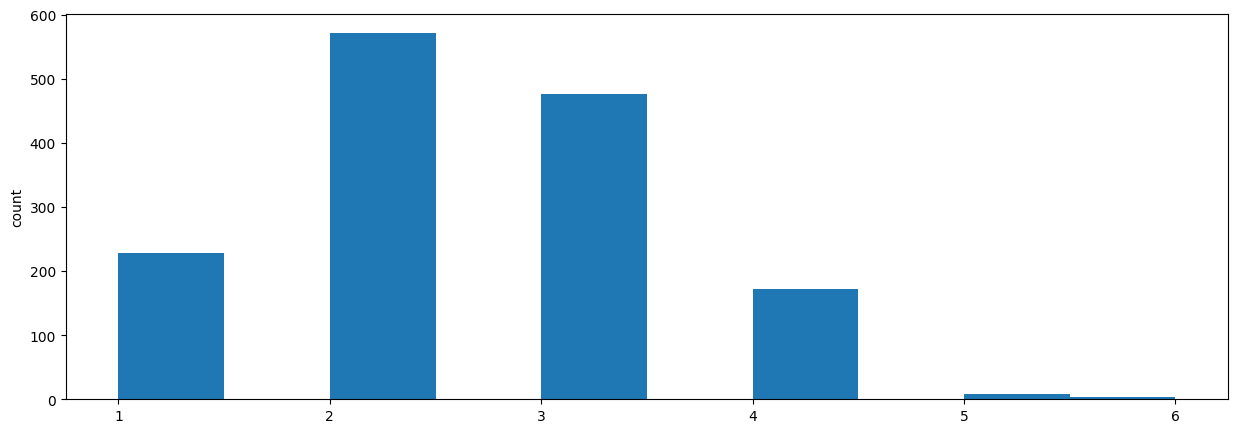

HouseAge
Skew : 0.61


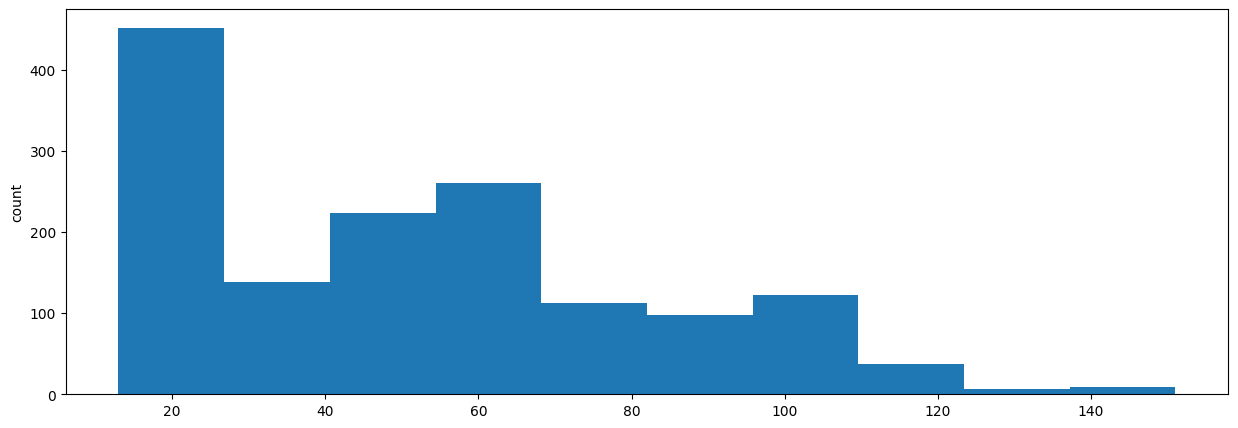

In [ ]:
# membuat histogram dan boxplot untuk data numerik
for ncol in num_col:
  if ncol not in ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']: # mengecualikan kolom yang bertipe numerik tetapi bersifat kategorik
    print(ncol)
    print('Skew :', round(df[ncol].skew(), 2)) # mengecek kecondongan data
    plt.figure(figsize = (15, 5))
    df[ncol].hist(grid = False)
    plt.ylabel('count')
    plt.show()

Berdasarkan distribusi data di atas, dapat diketahui bahwa terdapat beberapa kolom yang datanya hampir terdistribusi normal. Namun, tidak sedikit kolom yang datanya cenderung positive skew.

## Bivariate Analysis

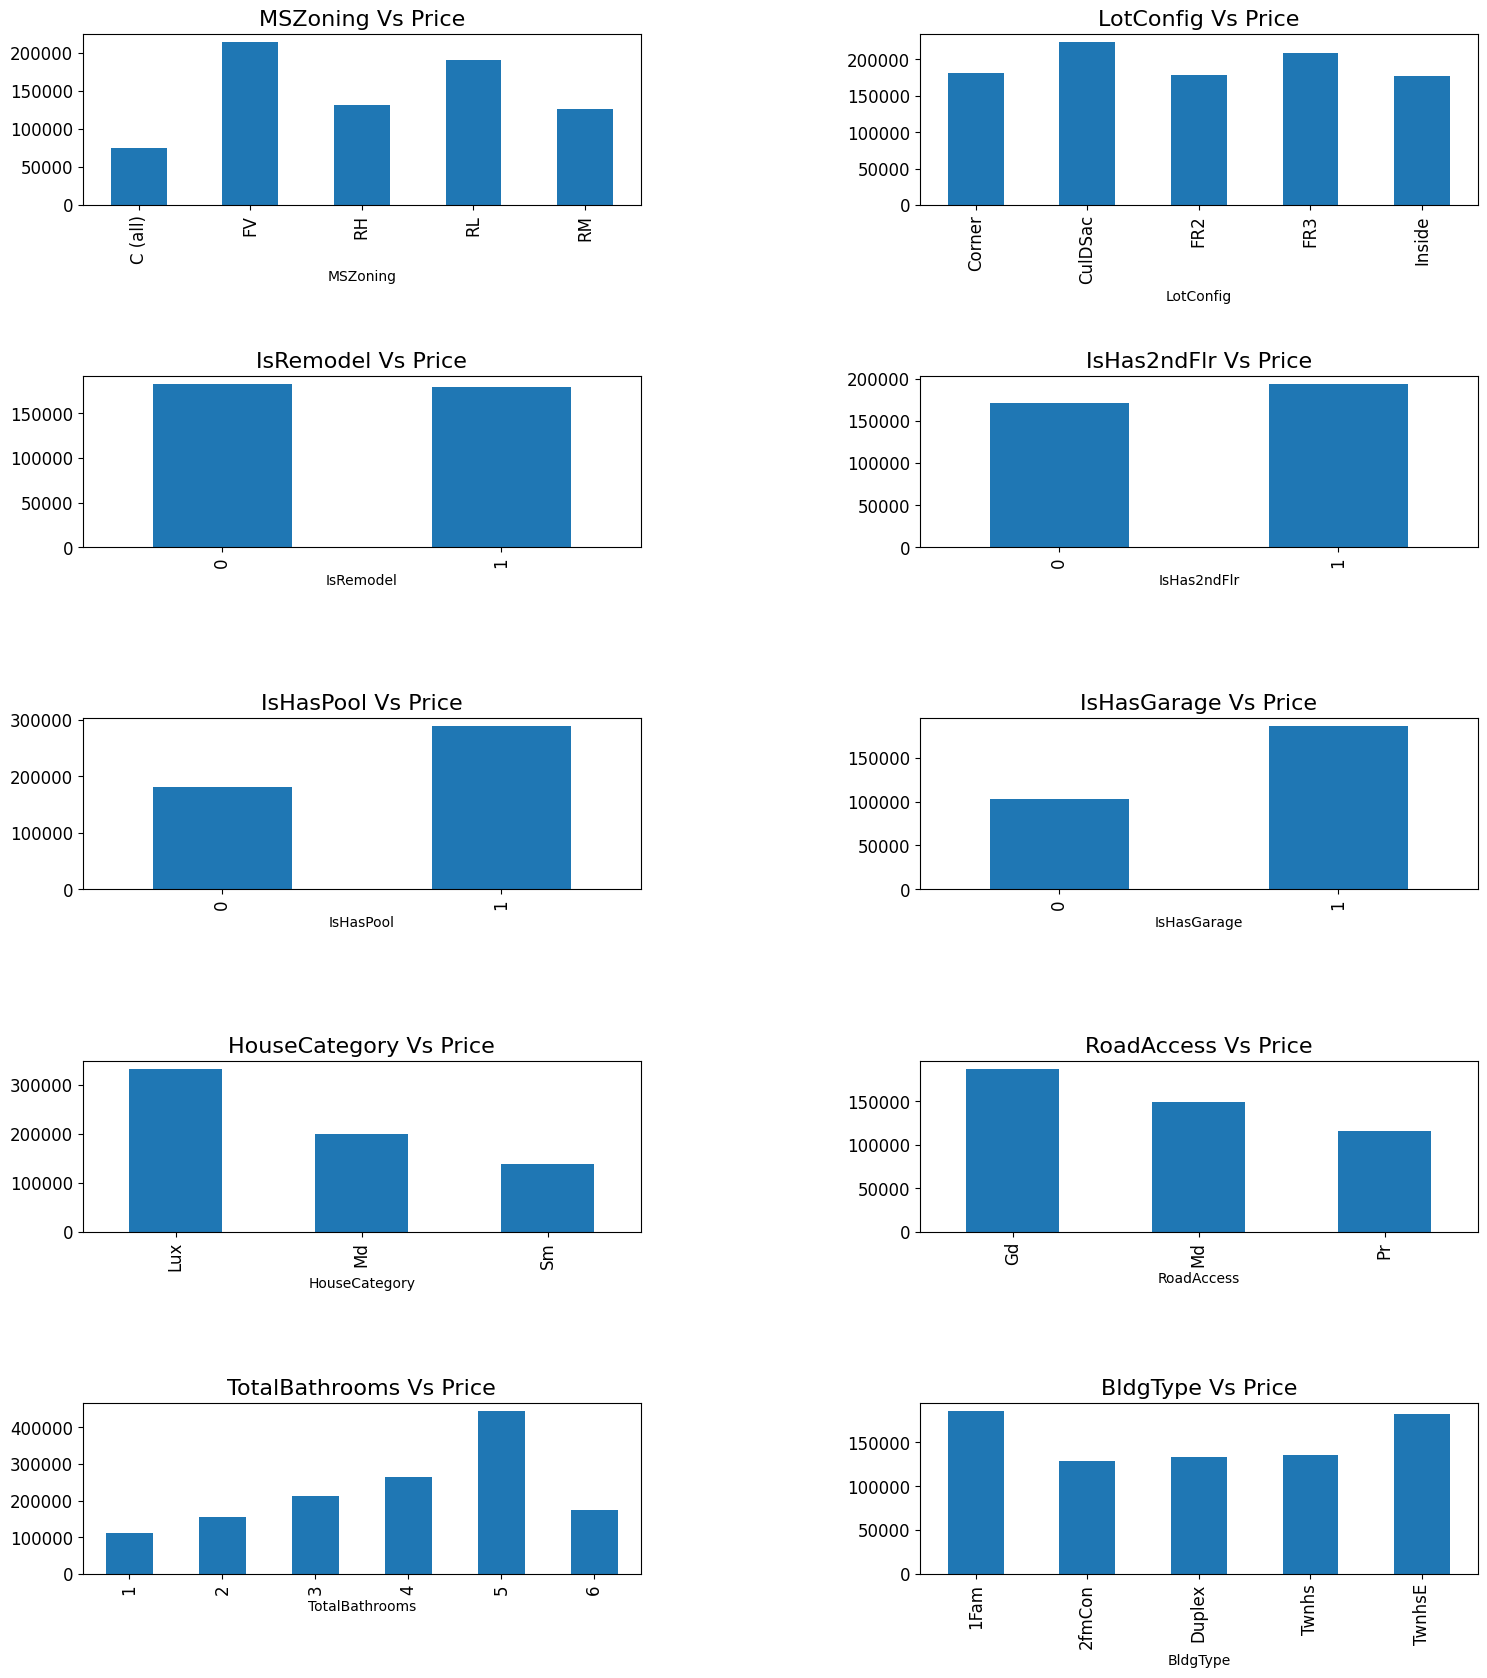

In [ ]:
# mengecek hubungan antara kolom-kolom dalam bi_col dengan SalePrice
bi_col = ['MSZoning', 'LotConfig', 'IsRemodel', 'IsHas2ndFlr', 'IsHasPool', 'IsHasGarage', 'HouseCategory', 'RoadAccess', 'TotalBathrooms', 'BldgType']

n_rows = (len(bi_col) + 1) // 2
fig, axee = plt.subplots(n_rows, 2, figsize=(18, 20))
plt.subplots_adjust(hspace = 1)
plt.subplots_adjust(wspace = .5)

axee = axee.flatten()

for i, bcol in enumerate(bi_col):
  axee[i].set_title(f'{bcol} Vs Price', fontsize=16)
  df.groupby(bcol)['SalePrice'].mean().plot.bar(ax = axee[i], fontsize = 12)

Bar plot di atas menunjukkan korelasi antara kolom-kolom yang disebutkan dengan SalePrice. Dengan demikian, dapat diketahui pengaruh nilai dari kolom-kolom di atas dengan harga rumah. Berdasarkan gambar di atas dapat diketahui korelasi antara MSZoning, LotConfig, IsRemodel, IsHas2ndFlr, IsHasPool, dan IsHasGarage terhadap Price (harga rumah). Rata-rata harga rumah akan tinggi apabila rumah tersebut berada dalam Floating Village Residential. Rata-rata harga rumah juga tinggi dipengaruhi LotConfig yang berkategori CullDSac. Selain itu, rata-rata harga rumah akan tinggi apabila rumah tersebut tidak direnovasi, memiliki lantai 2, memiliki kolam renang, atau memiliki garasi. Rata-rata harga rumah juga dipengaruhi oleh kategori rumah dimana harga rumah akan mahal apabila masuk dalam kategori luxurious. Akses jalan juga mempengaruhi harga rumah dimana rumah dengan akses jalan yang baik akan memiliki rata-rata harga yang lebih tinggi. Jumlah kamar mandi juga mempengaruhi harga rumah dimana rumah dengan jumlah kamar mandi 5 rata-rata harga rumahnya lebih tinggi dibandingkan yang lainnya. Tipe rumah juga mempengaruhi harga rumah dimana rumah bertipe 1Fam memiliki rata-rata harga rumah yang lebih tinggi dibandingkan yang lainnya.

## Multivariate Analysis

In [ ]:
# mengecek korelasi antar kolom
df_corr = df.corr()
df_corr

<ipython-input-45-5692510e60cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalBathrooms,HouseAge
Id,1.000000,-0.009921,-0.010700,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.024850,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.013491,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.003105,0.012713
LotFrontage,-0.009921,1.000000,0.509320,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.268732,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,0.182540,-0.116685
LotArea,-0.010700,0.509320,1.000000,0.101182,0.074701,0.139659,0.177878,0.056778,0.106767,0.324756,0.396650,0.093598,-0.019635,0.367747,0.079519,0.031447,0.202166,0.095563,0.294193,-0.021127,0.373109,0.293896,0.150706,0.293884,0.326415,0.157434,0.123848,-0.023036,0.045209,0.093305,0.045309,0.037941,0.005935,-0.019012,0.400841,0.225661,-0.101182
YearBuilt,-0.012713,0.116685,0.101182,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.398708,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.507498,-1.000000
YearRemodAdd,-0.021998,0.083348,0.074701,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.293700,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.426079,-0.592855
MasVnrArea,-0.051071,0.178469,0.139659,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.316194,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,0.325309,-0.311600
BsmtFinSF1,-0.005024,0.214367,0.177878,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.420058,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.419852,-0.249503
BsmtFinSF2,-0.005968,0.042463,0.056778,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.103525,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.044435,0.049107
BsmtUnfSF,-0.007940,0.124098,0.106767,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.417270,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.042720,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,-0.112553,-0.149040
TotalBsmtSF,-0.024850,0.268732,0.324756,0.398708,0.293700,0.316194,0.420058,0.103525,0.417270,1.000000,0.729738,-0.219569,-0.032526,0.351447,0.293263,-0.002039,0.308014,-0.072126,0.043965,-0.068802,0.240468,0.309920,0.185299,0.442888,0.463480,0.223145,0.211001,-0.111171,0.045850,0.092750,0.002693,-0.017310,0.034366,-0.019659,0.594661,0.309012,-0.398708


<ipython-input-46-9249a8c3914f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('Id', axis=1).corr(), annot = True)


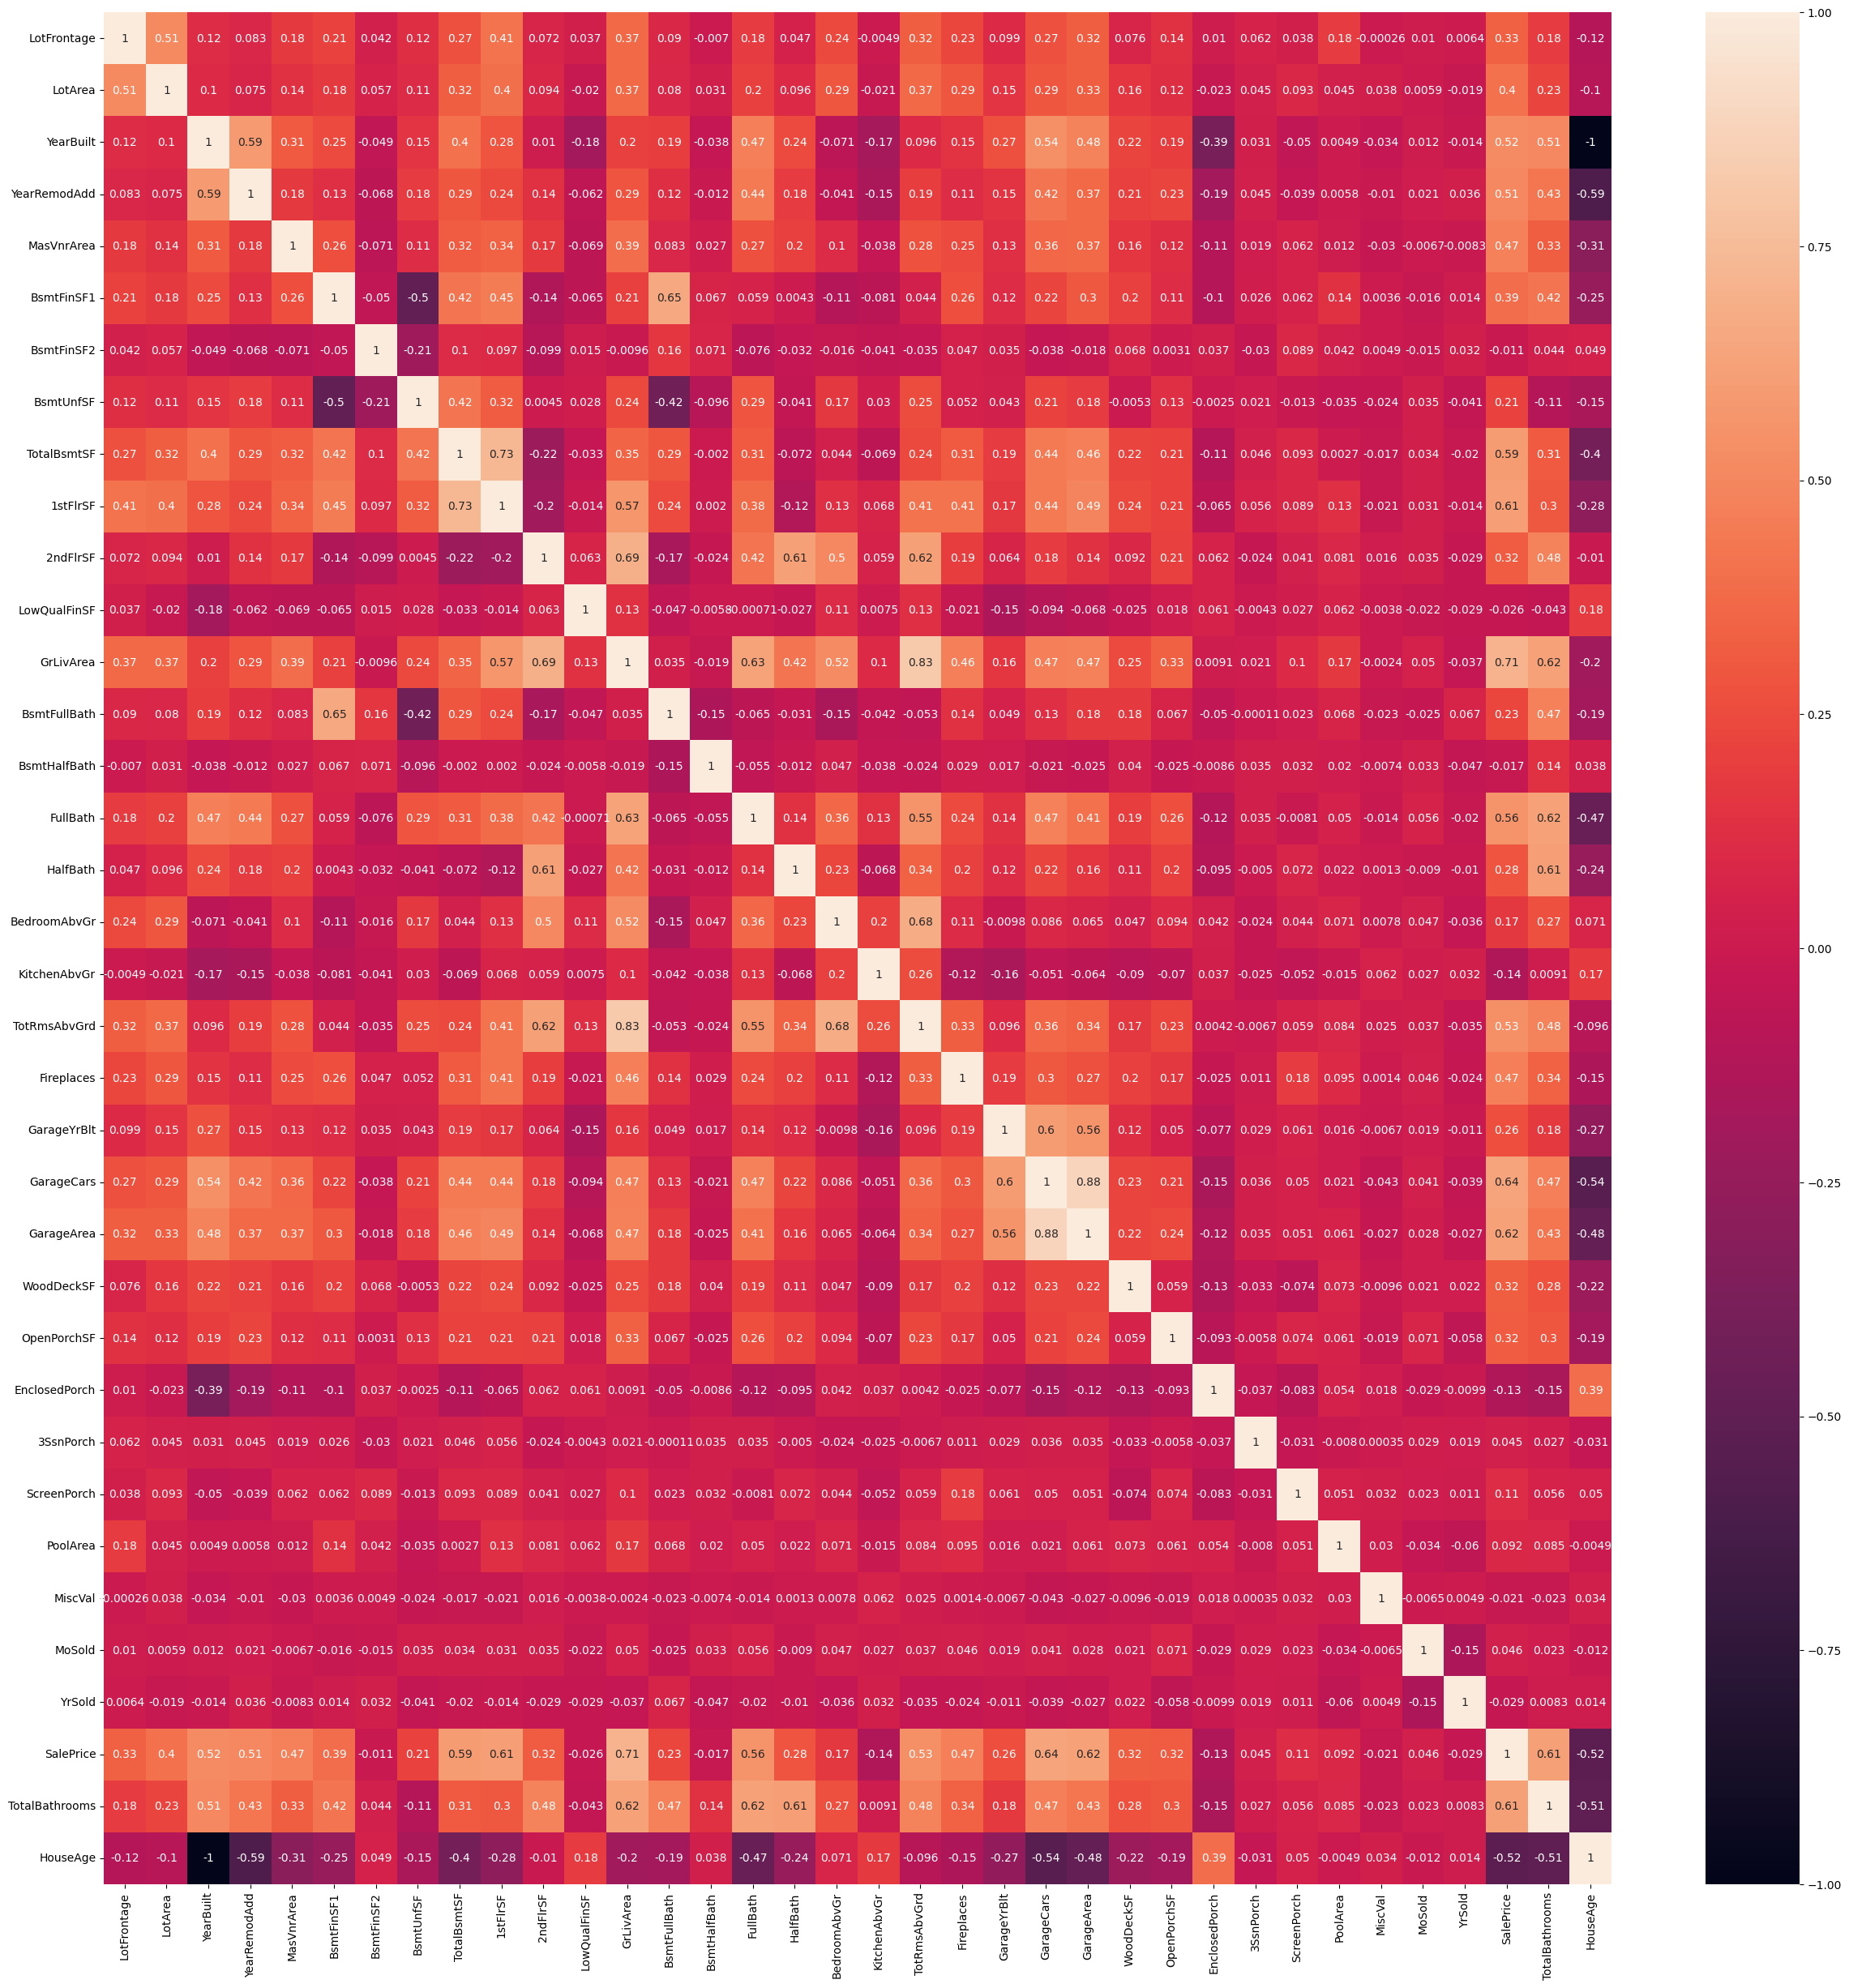

In [ ]:
# mengecek korelasi antar kolom dalam data numerik menggunakan heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df.drop('Id', axis=1).corr(), annot = True)
plt.show()

Berdasarkan gambar di di atas dapat diketahui korelasi antara kolom-kolom yang bersifat numerik terhadap harga rumah. Beberapa kolom yang tingkat pengaruhnya cukup tinggi (>0,4) terhadap harga rumah diurutkan dari yang sangat berpengaruh yaitu GrLivArea, GarageCars, GarageArea, 1stFlrSF, TotalBathrooms,  TotalBsmtSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, Fireplaces, MasVnrArea, dan LotArea.